# Updated: 2020-02-20

1. I've removed keras and instead use tensorflow.keras (this solved quite a bit of incompatibility issues on my side).
2. I've upgraded to Tensorflow==2.0.0. (solved some issues as well).
3. had to remove tqdm (see https://stackoverflow.com/questions/46469545/keras-progress-bar-not-working-on-windows-10)
4. Optimised EarlyStopping and Checkpointing

# Variables

In [1]:
MAX_NUM_WORDS = 20000
MAX_LEN = 300

# Function Definitions

In [2]:
import numpy as np

In [3]:
import random as rn
import tensorflow as tf

In [4]:
print (tf.__version__)

2.0.0


In [5]:
PY1 = tf.__version__.startswith('1')
PY2 = tf.__version__.startswith('2')

if PY1:
    print("Tensorflow 1 - ", tf.__version__ )
    from keras import backend as K
    K.tensorflow_backend._get_available_gpus()
    gpu = K.tensorflow_backend._get_available_gpus()
    len(gpu)
    
if PY2:
    print("Tensorflow 2 - ", tf.__version__ )
    import tensorflow as tf
    from keras import backend as K
    gpu = tf.config.experimental.list_physical_devices('GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpu), "Physical GPUs,", len(logical_gpus), "Logical GPUs")

Tensorflow 2 -  2.0.0


Using TensorFlow backend.


1 Physical GPUs, 1 Logical GPUs


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.externals import joblib

import collections
import os
import pandas as pd 
import re
import _pickle as cPickle

from IPython.display import display
from collections import Counter
from collections import OrderedDict

c:\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [7]:
import sklearn
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

c:\python\python37\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import pandas as pd 
import multiprocessing

In [9]:
import gensim
from gensim.models import Word2Vec
from gensim.models.tfidfmodel import TfidfModel
from gensim.matutils import sparse2full
from gensim.corpora import Dictionary

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense, Activation, Dropout, Masking, Embedding,SpatialDropout1D
from tensorflow.keras.layers import Embedding, Bidirectional
#from keras.layers import CuDNNGRU,CuDNNLSTM
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, GlobalMaxPooling1D

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical

from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import confusion_matrix
import re

****

In [12]:
from utilities import preprocessing
twitter = preprocessing.TwitterPreprocessing()

Initialiseer TwitterPreprocessing 1.1 ...
twitterTokenizer by Balikas Georgios ...
Negation: (disabled)
Keep Numbers: True
Keep Smileys: True


In [13]:
FastNgram = "D:/Data/oluwafemi/Fast_N-Gram.csv"
Fast1 = pd.read_csv(FastNgram, encoding='ISO-8859-1', header=0)
XFast = pd.DataFrame(data=Fast1, columns=['Tweet', 'Class'])

In [14]:
XFast.head()

,Tweet,Class
0,"Orania,the whites-only town did the unfathomab...",1
1,Apart from maybe one small assessment of hers ...,1
2,Did #Orania participate on #Elections2019 ?,1
3,#DateMyFamily No wonder he's single coz his at...,2
4,The EFF in the Northern Cape says it is unacce...,1


In [15]:
import collections

c = collections.Counter(XFast.Class.values)
c

Counter({1: 13238, 2: 1290, 3: 368})

In [16]:
XFast["clean_tweet"] = XFast["Tweet"].apply(lambda x: twitter.tweet_processing(x))

In [17]:
XFast.head()

,Tweet,Class,clean_tweet
0,"Orania,the whites-only town did the unfathomab...",1,orania the whites only town did the unfathomab...
1,Apart from maybe one small assessment of hers ...,1,apart from maybe one small assessment of hers ...
2,Did #Orania participate on #Elections2019 ?,1,did orania participate on elections####
3,#DateMyFamily No wonder he's single coz his at...,2,datemyfamily no wonder he is single coz his at...
4,The EFF in the Northern Cape says it is unacce...,1,the eff in the northern cape says it is unacce...


In [18]:
XFast['clean_tweet'] = XFast['clean_tweet'].replace('[^a-zA-Z ]', '', regex=True)

In [19]:
XFast.head()

,Tweet,Class,clean_tweet
0,"Orania,the whites-only town did the unfathomab...",1,orania the whites only town did the unfathomab...
1,Apart from maybe one small assessment of hers ...,1,apart from maybe one small assessment of hers ...
2,Did #Orania participate on #Elections2019 ?,1,did orania participate on elections
3,#DateMyFamily No wonder he's single coz his at...,2,datemyfamily no wonder he is single coz his at...
4,The EFF in the Northern Cape says it is unacce...,1,the eff in the northern cape says it is unacce...


In [20]:
Lemmatizer= WordNetLemmatizer()

def lemmatize_text(Tweet):
    return [Lemmatizer.lemmatize(w) for w in Tweet.split() if not w in set(stopwords.words('english'))]

In [21]:
XFast["lemma_tweet"] = XFast["clean_tweet"].apply(lambda x: lemmatize_text(x))

In [22]:
XFast.head()

,Tweet,Class,clean_tweet,lemma_tweet
0,"Orania,the whites-only town did the unfathomab...",1,orania the whites only town did the unfathomab...,"[orania, white, town, unfathomable, election, ..."
1,Apart from maybe one small assessment of hers ...,1,apart from maybe one small assessment of hers ...,"[apart, maybe, one, small, assessment, disagre..."
2,Did #Orania participate on #Elections2019 ?,1,did orania participate on elections,"[orania, participate, election]"
3,#DateMyFamily No wonder he's single coz his at...,2,datemyfamily no wonder he is single coz his at...,"[datemyfamily, wonder, single, coz, attitude, ..."
4,The EFF in the Northern Cape says it is unacce...,1,the eff in the northern cape says it is unacce...,"[eff, northern, cape, say, unacceptable, allow..."


In [23]:
fast1 = XFast['lemma_tweet']

In [24]:
fas1=[' '.join(x) for x in fast1]

In [25]:
fas1[0]

'orania white town unfathomable election eff secure vote orania none u expected one'

In [26]:
y1 = XFast['Class']

In [27]:
c = collections.Counter(y1)
c

Counter({1: 13238, 2: 1290, 3: 368})

# train_test_split

In [28]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(fas1, y1, test_size=0.25, random_state=0)

In [29]:
Xtrain[0]

'celebspick indie film watch summer via'

# Features

## KERAS Tokenizing and Padding

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(Xtrain)

In [31]:
train_sequences = tokenizer.texts_to_sequences(Xtrain)
test_sequences = tokenizer.texts_to_sequences(Xtest)

In [32]:
train_sequences[0]

[5273, 1, 239, 116, 762, 57]

In [33]:
pad_seq_train_word = pad_sequences(train_sequences,maxlen=MAX_LEN)
pad_seq_test_word = pad_sequences(test_sequences,maxlen=MAX_LEN)

In [34]:
pad_seq_train_word.shape

(11172, 300)

In [35]:
sm=SMOTE()
sm_train_word, sm_ytrain_word = sm.fit_sample(pad_seq_train_word, Ytrain)

c:\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
c:\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [36]:
sm_train_word.shape

(29838, 300)

In [37]:
sm_ytrain_word.shape

(29838,)

## Word N-gram (Unigram)

In [38]:
from imblearn.pipeline import Pipeline

In [39]:
print(collections.Counter(Ytrain))
Y_Train_C = pd.get_dummies(Ytrain).values  # Convert categorical variable into dummy/indicator variables.
print(Y_Train_C.shape)

print(collections.Counter(Ytest))
Y_Test_C = pd.get_dummies(Ytest).values  # Convert categorical variable into dummy/indicator variables.
print(Y_Test_C.shape)

Counter({1: 9946, 2: 943, 3: 283})
(11172, 3)
Counter({1: 3292, 2: 347, 3: 85})
(3724, 3)


In [40]:
cv_ngram= CountVectorizer(ngram_range=(1,1))# Unigram
tfidf = TfidfTransformer(use_idf=True)

In [41]:
count_word_train=cv_ngram.fit_transform(Xtrain)
tfidf_word_train=tfidf.fit_transform(count_word_train)

count_word_test=cv_ngram.transform(Xtest)
tfidf_word_test=tfidf.transform(count_word_test)

In [42]:
tfidf_word_train.shape

(11172, 20854)

In [43]:
tfidf_word_test.shape

(3724, 20854)

In [44]:
sm=SMOTE()
sm_train_word, sm_ytrain_word = sm.fit_sample(tfidf_word_train, Ytrain)

c:\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [45]:
sm_train_word.shape

(29838, 20854)

In [46]:
sm_ytrain_word.shape

(29838,)

## Char N-gram (Trigram)

In [47]:
cv_ngram_char= CountVectorizer( analyzer = 'char', ngram_range=(3,3))# Character 3-gram

In [48]:
count_char_train=cv_ngram_char.fit_transform(Xtrain)
tfidf_char_train=tfidf.fit_transform(count_char_train)

count_char_test=cv_ngram_char.transform(Xtest)
tfidf_char_test=tfidf.transform(count_char_test)


In [49]:
sm=SMOTE()
sm_train_char, sm_ytrain_char = sm.fit_sample(tfidf_char_train, Ytrain)

c:\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [50]:
sm_train_char.shape

(29838, 8685)

In [51]:
sm_ytrain_char.shape

(29838,)

## Part of Speech Ngram (Unigram)

In [52]:
from nltk import word_tokenize
from nltk import pos_tag

In [53]:
tagged_words = [nltk.pos_tag(x) for x in fast1]
tags = [[tag for word, tag in sent] for sent in tagged_words]
tag1=[' '.join(x) for x in tags]
XPOS_train, XPOS_test, Ytrain, Ytest = train_test_split(tag1, y1, test_size=0.25, random_state=0)

In [54]:
count_POS_train=cv_ngram.fit_transform(XPOS_train)
tfidf_POS_train=tfidf.fit_transform(count_POS_train)

count_POS_test=cv_ngram.transform(XPOS_test)
tfidf_POS_test=tfidf.transform(count_POS_test)

In [55]:
sm=SMOTE()
sm_train_POS, sm_ytrain_POS = sm.fit_sample(tfidf_POS_train, Ytrain)

c:\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [56]:
sm_train_POS.shape

(29838, 30)

In [57]:
sm_ytrain_POS.shape

(29838,)

## Word2Vec

In [58]:
LabeledSentence = gensim.models.doc2vec.LabeledSentence

In [59]:
def labelizeTweets(tweets, label_type):
    labelized1=[]
    for i,v in enumerate(tweets):
        label1 = '%s_%s'%(label_type,i)
        labelized1.append(LabeledSentence(v,[label1]))
    return labelized1

In [60]:
FastW1_train = labelizeTweets(fast1, 'TRAIN')

c:\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """


In [61]:
len(FastW1_train)

14896

In [62]:
FastW1_train[0]

LabeledSentence(words=['orania', 'white', 'town', 'unfathomable', 'election', 'eff', 'secure', 'vote', 'orania', 'none', 'u', 'expected', 'one'], tags=['TRAIN_0'])

In [63]:
#lets train word2vec only on training dataset, same test_size and random_state
w2v_X_train, w2v_X_test, w2v_y_train, w2v_y_test = train_test_split(FastW1_train, y1, test_size=0.25, random_state=0)

In [64]:
#tweet_w2v3 = Word2Vec(min_count=1, size=300, workers=cores-1, window=10, sg=1) # sg=0 for cbow
#tweet_w2v3.build_vocab([x.words for x in FastW1_train])
#tweet_w2v3.train([x.words for x in FastW1_train], total_examples=tweet_w2v3.corpus_count, epochs=30)
   
location_sg = 'D:\\Data\\Oluwafemi\\w2v_model_ug_sg.model'
if os.path.exists(location_sg):
    print('Found and load: {}'.format(location_sg))
    tweet_w2v3 = gensim.models.Word2Vec.load(location_sg)
else:
    print('{} not found. training model'.format(location_sg))
    tweet_w2v3 = Word2Vec(min_count=1, size=300, workers=8, window=10, sg=1) # sg=0 for cbow
    tweet_w2v3.build_vocab([x.words for x in w2v_X_train])
    tweet_w2v3.train([x.words for x in w2v_X_train], total_examples=tweet_w2v3.corpus_count, epochs=30)

    print('Model done training. Saving to disk for re-use later on.')
    tweet_w2v3.save(location_sg)

Found and load: D:\Data\Oluwafemi\w2v_model_ug_sg.model


In [65]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1,size))
    count = 0
    for word in tokens:
        try:
            vec += tweet_w2v3[word].reshape((1,size))
            count += 1
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [66]:
#train_w2v =  np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x.words, FastW1_train))]
train_w2v =  np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x.words, w2v_X_train)])
train_w2v = scale(train_w2v)

test_w2v =  np.concatenate([buildWordVector(z, 300) for z in map(lambda x: x.words, w2v_X_test)])
test_w2v = scale(test_w2v)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
c:\python\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [67]:
train_w2v.shape

(11172, 300)

In [68]:
train_w2v[0][0:10]

array([-1.16170139, -0.77504967,  0.54966849, -0.22912456, -1.83478542,
       -0.11451985, -1.66861817,  1.05525522, -0.67818373,  2.4754758 ])

In [69]:
test_w2v.shape

(3724, 300)

In [70]:
test_w2v[0][0:10]

array([ 0.08652669,  0.0282731 , -0.49224597, -0.39711148, -0.16626049,
       -0.3548626 , -0.48072171, -0.66454981, -0.77562962,  0.29001574])

In [71]:
def get_min_value_train():
    min_values = []
    for i in range(0, len(train_w2v)):
        min_value = min(train_w2v[i])
        min_values.append(min_value)

    return min(min_values)


a_train = get_min_value_train()
a_train_Abs = abs(a_train)
a_train_trans = train_w2v + a_train_Abs
len(a_train_trans)

11172

In [72]:
def get_min_value_test():
    min_values = []
    for i in range(0, len(test_w2v)):
        min_value = min(test_w2v[i])
        min_values.append(min_value)

    return min(min_values)


a_test = get_min_value_test()
a_test_Abs = abs(a_test)
a_test_trans = test_w2v + a_test_Abs
len(a_test_trans)

3724

In [73]:
sm = SMOTE()

w2v_sm_X_train, w2v_sm_y_train = sm.fit_sample(a_train_trans, w2v_y_train)
w2v_X_test, w2v_y_test = a_test_trans.copy(), w2v_y_test.copy()

c:\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
c:\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [74]:
w2v_sm_X_train.shape

(29838, 300)

In [75]:
w2v_X_test.shape

(3724, 300)

In [76]:
w2v_sm_X_train[0][0:5]

array([ 8.48981785,  8.87646957, 10.20118773,  9.42239468,  7.81673383])

In [77]:
w2v_X_test[0][0:5]

array([10.64583623, 10.58758264, 10.06706357, 10.16219806, 10.39304905])

In [78]:
c = collections.Counter(w2v_sm_y_train)
c

Counter({1: 9946, 2: 9946, 3: 9946})

## Doc2Vec

In [79]:
fast1[0]

['orania',
 'white',
 'town',
 'unfathomable',
 'election',
 'eff',
 'secure',
 'vote',
 'orania',
 'none',
 'u',
 'expected',
 'one']

In [80]:
len(fast1)

14896

According to their documentation, must have the data in format of TaggedDocument and must be all the data.

In [81]:
from gensim.models import Doc2Vec
from sklearn import utils
from gensim.models.doc2vec import TaggedDocument

In [82]:
# https://github.com/tthustla/twitter_sentiment_analysis_part6/blob/master/Capstone_part4-Copy4.ipynb

def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t, [prefix + '_%s' % i]))
    return result

In [83]:
all_x_w2v = labelize_tweets_ug(fast1, 'all')

In [84]:
all_x_w2v[0]

TaggedDocument(words=['orania', 'white', 'town', 'unfathomable', 'election', 'eff', 'secure', 'vote', 'orania', 'none', 'u', 'expected', 'one'], tags=['all_0'])

In [85]:
def d2v_train_model(model, all_x_w2v, location):
    '''
    According to the developer Radim ÃÂÃÂÃÂÃÂehÃÂÃÂÃÂÃÂ¯ÃÂÃÂÃÂÃÂek who created Gensim, "One caveat of the way this algorithm runs is that, 
    since the learning rate decrease over the course of iterating over the data, labels which are only seen in a single 
    LabeledSentence during training will only be trained with a fixed learning rate. This frequently produces less than optimal results."

    Below iteration implement explicit multiple-pass, alpha-reduction approach with added shuffling. 
    This has been already presented in Gensim's IMDB tutorial.
    '''
    model.build_vocab([x for x in all_x_w2v])
    
    print('Implement explicit multiple-pass, alpha-reduction approach with added shuffling')
    for epoch in range(30):
        model.train(utils.shuffle([x for x in all_x_w2v]), total_examples=len(all_x_w2v), epochs=1)
        model.alpha -= 0.002            # decrease the learning rate
        model.min_alpha = model.alpha   # fix the learning rate, no decay
        
    model.save(location)

    print(model)
    print(model.epochs)
    
    return model

In [86]:
location = 'D:\\Data\\Oluwafemi\\d2v_model_ug_dbow.model'
if os.path.exists(location):
    print('Found and load: {}'.format(location))
    model_dbow1 = Doc2Vec.load(location)
    model_dbow1.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
else:
    print('{} not found. training model'.format(location)) 
    model_dbow1 = Doc2Vec(dm=0, vector_size=300, negative=20, workers=8) #dbow =0 works like skipgram
    model_dbow1 = d2v_train_model(model_dbow1, all_x_w2v, location)

Found and load: D:\Data\Oluwafemi\d2v_model_ug_dbow.model


In [87]:
#from: https://github.com/tthustla/twitter_sentiment_analysis_part6/blob/master/Capstone_part4-Copy4.ipynb
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)        
        vecs[n] = model.docvecs[prefix] # just get the vectors for index=1 (no need for the corpus)
        n += 1
    return vecs

In [88]:
all_vecs_d2v = get_vectors(model_dbow1, pd.DataFrame(fast1), 300)
print(all_vecs_d2v.shape)

(14896, 300)


In [89]:
all_vecs_d2v[0][0:5]

array([ 0.04759809,  0.0580029 ,  0.16538611, -0.00452018, -0.0688673 ])

In [90]:
len(all_vecs_d2v)

14896

In [91]:
len(y1)

14896

In [92]:
c = collections.Counter(y1)
c

Counter({1: 13238, 2: 1290, 3: 368})

In [93]:
d2v_X_train, d2v_X_test, d2v_y_train, d2v_y_test = train_test_split(all_vecs_d2v, y1, test_size=0.25, random_state=0)

In [94]:
def get_min_value_train():
    min_values1 = []
    for i in range(0, len(d2v_X_train)):
        min_value1 = min(d2v_X_train[i])
        min_values1.append(min_value1)

    return min(min_values1)

a_train1 = get_min_value_train()
a_train_Abs1 = abs(a_train1)
a_train_trans1 = d2v_X_train + a_train_Abs1
len(a_train_trans1)

11172

In [95]:
def get_min_value_test():
    min_values1 = []
    for i in range(0, len(d2v_X_test)):
        min_value1 = min(d2v_X_test[i])
        min_values1.append(min_value1)

    return min(min_values1)

a_test1 = get_min_value_test()
a_test_Abs1 = abs(a_test1)
a_test_trans1 = d2v_X_test + a_test_Abs1
len(a_test_trans1)

3724

In [96]:
sm = SMOTE()

d2v_sm_X_train, d2v_sm_y_train = sm.fit_sample(a_train_trans1, d2v_y_train)
d2v_X_test, d2v_y_test = a_test_trans1.copy(), d2v_y_test.copy()

c:\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
c:\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [97]:
d2v_sm_X_train.shape

(29838, 300)

In [98]:
d2v_X_test.shape

(3724, 300)

In [99]:
c = collections.Counter(d2v_y_train)
c

Counter({1: 9946, 2: 943, 3: 283})

In [100]:
c = collections.Counter(d2v_y_test)
c

Counter({1: 3292, 2: 347, 3: 85})

# EarlyStopping

In [101]:
# https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# Define Training Model

In [102]:
batch_size = 64
nb_epochs = 100
NO_CLASSES = 3
embed_dim = 128
#MAX_NUM_WORDS = 20000

In [103]:
#def train_model(model, model_name, X, Y):
def train_model(model, model_name, Word2Vec_X_Train, Word2Vec_X_Test, Word2Vec_y_Train, Word2Vec_y_Test):
    
    # By default, any change in the performance measure, no matter how fractional, will be considered an improvement. 
    # You may want to consider an improvement that is a specific increment, such as 1 unit for mean squared error or 0.01% for accuracy. 
    # This can be specified via the ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¢ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂmin_deltaÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¢ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ argument.
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001)
    mc = ModelCheckpoint('D:\\Data\\Oluwafemi\\'+model_name+'.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

    X_train = Word2Vec_X_Train.copy()
    Y_train = Word2Vec_y_Train.copy()
    X_test  = Word2Vec_X_Test.copy()
    Y_test  = Word2Vec_y_Test.copy()
    
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    # Fit the model
    estimator=model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        shuffle=True,
                        epochs=nb_epochs,
                        verbose=1,
                        validation_split=0.1,
                        callbacks=[es, mc])

    scores = model.evaluate(X_test, Y_test, verbose=2)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    output_test = model.predict(X_test)
    final_pred = np.argmax(output_test, axis=1)
    org_y_label = [np.where(r==1)[0][0] for r in Y_test]
    
    print('')
    #print(org_y_label)
    results = confusion_matrix(org_y_label, final_pred)
    print(results)
    
    #Compute precision, recall, F-measure and support for each class
    #  average='macro'
    #  Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    #  The support is the number of occurrences of each class in y_true.
    
    precisions, recall, f1_score, true_sum = metrics.precision_recall_fscore_support(org_y_label, final_pred, average='macro')
    
    print('')    
    print('Classify NN Precision = %0.3f (STD +/- %0.2f)' % (np.mean(precisions), np.std(precisions) * 2)) 
    print('Classify NN Recall    = %0.3f (STD +/- %0.2f)' % (np.mean(recall), np.std(recall) * 2)) 
    print('Classify NN F1 Score  = %0.3f (STD +/- %0.2f)' % (np.mean(f1_score), np.std(f1_score) * 2)) 
    print('Classify NN y_true    = ', true_sum) 
    
    pred_indices = np.argmax(output_test, axis=1)
    classes = np.array(range(0,NO_CLASSES))
    preds = classes[pred_indices]
    
    print('')
    print('Log loss: {}'.format(log_loss(classes[np.argmax(Y_test, axis=1)], output_test)))
    print('Accuracy: {}'.format(accuracy_score(classes[np.argmax(Y_test, axis=1)], preds)))
    
    # summarize history for accuracy
    plt.plot(estimator.history['acc'])
    plt.plot(estimator.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(estimator.history['loss'])
    plt.plot(estimator.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

# Keras Models

## MLP Model

In [104]:
def mlp_model(X):
    
    tf.keras.backend.clear_session()
        
    print('Building model...')
    model = Sequential()
    model.add(Dense(512, input_shape=(X.shape[1],)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NO_CLASSES))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    
    return model

## LSTM Model

In [105]:
def basic_LSTM():
    
    tf.keras.backend.clear_session()
    CuDNNLSTM = tf.compat.v1.keras.layers.CuDNNLSTM
    
    max_features = MAX_NUM_WORDS
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, 128, trainable = True))
    if len(gpu) > 0:
        print("Using GPU")
        model.add(CuDNNLSTM(128)) # for GPU
        # Recurrent dropout is not implemented in cuDNN RNN ops. At the cuDNN level. So we can't have it in Keras.
    else:        
        print("Using CPU")
        model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # for CPU
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()

    return model

## GRU Model

In [106]:
def basic_GRU():
    
    tf.keras.backend.clear_session()
    CuDNNGRU = tf.compat.v1.keras.layers.CuDNNGRU
    
    max_features = MAX_NUM_WORDS
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, 128, trainable = True))
    if len(gpu) > 0:
        print("Using GPU")
        model.add(CuDNNGRU(128)) # for GPU
        # Recurrent dropout is not implemented in cuDNN RNN ops. At the cuDNN level. So we can't have it in Keras.
    else:        
        print("Using CPU")
        model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2)) # for CPU
        
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()

    return model

## Double Layer CNN Model

In [107]:
# DoubleCNN
def double_cnn(X):
    
    tf.keras.backend.clear_session()
    
    LENGTH=X.shape[1]
    
    # Convolution
    filters = 128
    kernel_size = 5
    DEPTH=128
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(MAX_NUM_WORDS, DEPTH, input_length = LENGTH, trainable = True))
    model.add(Conv1D(DEPTH, kernel_size, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(Conv1D(DEPTH, kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    
    return model    

## Double Layer LSTM Model

In [108]:
def stack_LSTM(X):
    
    tf.keras.backend.clear_session()
    CuDNNLSTM = tf.compat.v1.keras.layers.CuDNNLSTM
    
    LENGTH=X.shape[1]
    max_features = MAX_NUM_WORDS
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length = LENGTH, trainable = True))
    
    if len(gpu) > 0:
        print("Using GPU")
        model.add(CuDNNLSTM(128, return_sequences=True)) # for GPU
        model.add(CuDNNLSTM(128)) 
    else:        
        print("Using CPU")
        model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)) # for CPU
        model.add(LSTM(128))  
        
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()

    return model

## Double Layer GRU

In [109]:
def stack_GRU(X):
    
    tf.keras.backend.clear_session()
    CuDNNGRU = tf.compat.v1.keras.layers.CuDNNGRU
    
    LENGTH = X.shape[1]
    max_features = MAX_NUM_WORDS
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length = LENGTH, trainable = True))
    if len(gpu) > 0:
        print("Using GPU")
        model.add(CuDNNGRU(128, return_sequences = True)) # for GPU
        model.add(CuDNNGRU(128))   
        # Recurrent dropout is not implemented in cuDNN RNN ops. At the cuDNN level. So we can't have it in Keras.
    else:        
        print("Using CPU")
        model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2, return_sequences = True)) # for CPU
        model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2)) 
        
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()

    return model

## BiLSTM Model

In [110]:
def bi_LSTM(X):
    
    tf.keras.backend.clear_session()
    CuDNNLSTM = tf.compat.v1.keras.layers.CuDNNLSTM
    
    LENGTH = X.shape[1]
    max_features = MAX_NUM_WORDS
    LSTM_SIZE = 64
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, LSTM_SIZE, input_length = LENGTH, trainable = True))
    if len(gpu) > 0:
        print("Using GPU")
        model.add(Bidirectional(CuDNNLSTM(LSTM_SIZE))) # for GPU
        # Recurrent dropout is not implemented in cuDNN RNN ops. At the cuDNN level. So we can't have it in Keras.
    else:        
        print("Using CPU")
        model.add(Bidirectional(LSTM(LSTM_SIZE, recurrent_dropout=0.2))) # for CPU
        model.add(Dropout(0.25))
    
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()

    return model

## BiGRU Model

In [111]:
def bi_GRU(X):
    
    tf.keras.backend.clear_session()
    CuDNNGRU = tf.compat.v1.keras.layers.CuDNNGRU
    
    LENGTH = X.shape[1]
    max_features = MAX_NUM_WORDS
    LSTM_SIZE = 64
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features,LSTM_SIZE, input_length = LENGTH, trainable = True))
    if len(gpu) > 0:
        print("Using GPU")
        model.add(Bidirectional(CuDNNGRU(LSTM_SIZE))) # for GPU
        # Recurrent dropout is not implemented in cuDNN RNN ops. At the cuDNN level. So we can't have it in Keras.
    else:        
        print("Using CPU")
        model.add(Bidirectional(GRU(LSTM_SIZE, recurrent_dropout=0.2))) # for CPU
        model.add(Dropout(0.25))
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()

    return model


## CNN_LSTM

In [112]:
def CNN_LSTM(X):
   
    tf.keras.backend.clear_session()

    LENGTH = X.shape[1]
    DEPTH = 128
    max_features = MAX_NUM_WORDS
    
    # Convolution
    kernel_size = 5
    filters = 64
    pool_size = 4
    
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, DEPTH, input_length = LENGTH, trainable = True))
    model.add(Conv1D(DEPTH,
                     kernel_size,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size)) 
    model.add(LSTM(DEPTH))
    model.add(Dense(NO_CLASSES, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    
    return model

## CNN_GRU

In [113]:
def CNN_GRU(X):

    tf.keras.backend.clear_session()
        
    LENGTH = X.shape[1]
    DEPTH = 128
    max_features = MAX_NUM_WORDS
    
    # Convolution
    kernel_size = 5
    pool_size = 4
        
    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, DEPTH, input_length = LENGTH, trainable = True))
    model.add(Conv1D(DEPTH,
                     kernel_size,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size)) 
    model.add(GRU(DEPTH))
    model.add(Dense(NO_CLASSES, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    
    return model

****

# Training: Word2Vec Results

In [114]:
w2v_sm_X_train_df = pd.DataFrame(w2v_sm_X_train)
print(w2v_sm_X_train_df.shape)

w2v_X_test_df = pd.DataFrame(w2v_X_test)
print(w2v_X_test_df.shape)

(29838, 300)
(3724, 300)


In [115]:
w2v_sm_y_train_df = pd.get_dummies(w2v_sm_y_train).values  # Convert categorical variable into dummy/indicator variables.
print(w2v_sm_y_train_df.shape)

w2v_y_test_df = pd.get_dummies(w2v_y_test).values  # Convert categorical variable into dummy/indicator variables.
print(w2v_y_test_df.shape)

(29838, 3)
(3724, 3)


In [116]:
w2v_sm_X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,8.489818,8.876470,10.201188,9.422395,7.816734,9.536999,7.982901,10.706774,8.973336,12.126995,...,9.251771,11.608365,7.287406,9.887234,9.312489,9.398880,8.635003,9.465504,8.409901,10.985972
1,9.259488,10.386688,10.488864,8.579446,10.763140,9.935663,10.627133,9.857810,9.043672,10.190339,...,8.096921,10.278313,9.479521,10.033425,9.576719,8.402050,9.351069,9.797651,10.300235,9.694494
2,9.969703,9.622201,10.325703,11.277217,8.330096,10.135483,10.075315,7.543286,10.592921,11.193158,...,10.351460,8.341409,11.888565,7.897119,9.604136,10.211747,8.500257,9.570686,12.787005,7.231767
3,9.106477,10.299429,10.341523,8.417651,10.763904,10.764206,11.208989,9.329494,9.438739,10.885066,...,7.755535,9.908754,10.362965,10.307503,9.999137,10.239257,9.968608,9.921587,11.212063,9.488171
4,10.440738,10.067227,9.249693,9.704568,10.757522,9.551622,9.750970,9.511250,8.415782,9.041494,...,9.591110,8.997706,9.387001,11.096537,8.806329,9.415301,9.797148,10.638275,9.342196,9.555013


In [117]:
w2v_X_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,10.645836,10.587583,10.067064,10.162198,10.393049,10.204447,10.078588,9.894760,9.783680,10.849325,...,10.112106,9.954094,9.769734,9.640188,10.189863,10.351803,10.502284,10.437374,10.486730,9.984327
1,10.926557,11.288474,11.663832,9.616584,8.598988,10.327696,10.989275,11.224466,9.516789,10.222755,...,10.267996,12.243913,11.381854,11.536908,10.271720,10.646413,10.292511,12.845364,8.915779,10.181852
2,8.932827,9.799258,11.534747,11.237634,11.302982,11.406700,11.448374,10.358416,8.761602,10.364606,...,8.083610,7.885536,11.423053,9.973031,9.944055,9.455548,9.850612,11.824927,11.409035,9.377678
3,8.598956,10.281263,11.143097,11.276668,10.101345,10.919082,10.140406,11.728419,9.124720,10.579823,...,11.804504,9.320351,9.133346,8.614093,11.997911,7.580292,10.025479,11.865479,11.815471,12.540134
4,11.792130,11.407310,11.008821,9.740141,11.130279,11.268847,9.931413,11.151780,9.700236,10.601454,...,9.148395,10.236021,12.612017,9.768071,11.374497,11.649505,10.873421,10.911562,10.333639,10.792955


In [118]:
w2v_sm_y_train_df[0]

array([1, 0, 0], dtype=uint8)

In [119]:
w2v_y_test_df[0]

array([1, 0, 0], dtype=uint8)

In [120]:
c = collections.Counter(w2v_y_train)
c

Counter({1: 9946, 2: 943, 3: 283})

In [121]:
c = collections.Counter(w2v_y_test)
c

Counter({1: 3292, 2: 347, 3: 85})

### to avoid error: Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>

https://stackoverflow.com/questions/57874436/tensorflow-data-adapter-error-valueerror-failed-to-find-data-adapter-that-can

In [122]:
w2v_sm_X_train_df = np.asarray(w2v_sm_X_train_df)
w2v_X_test_df = np.asarray(w2v_X_test_df)

w2v_sm_y_train_df = np.asarray(w2v_sm_y_train_df)
w2v_y_test_df = np.asarray(w2v_y_test_df)

In [123]:
print(w2v_sm_X_train_df.shape)
print(w2v_X_test_df.shape)
print(w2v_sm_y_train_df.shape)
print(w2v_y_test_df.shape)

(29838, 300)
(3724, 300)
(29838, 3)
(3724, 3)


****

## Word2Vec + MLP (57.73%)

Building model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               154112    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 155,651
Trainable params: 155,651
Non-trainable params: 0
_________________________________________________________________
(29838, 300) (29838, 3)
(3724, 300) (3724, 3)
Train on 26854 samples, validate on 2984 samples
Epo

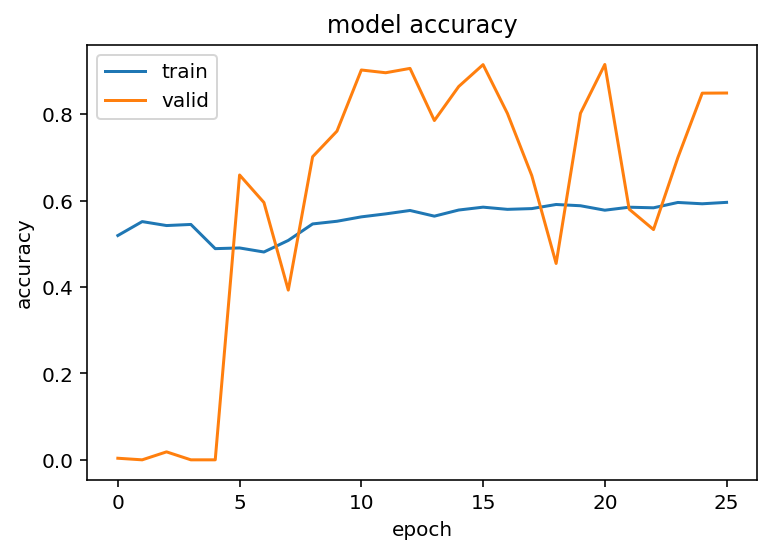

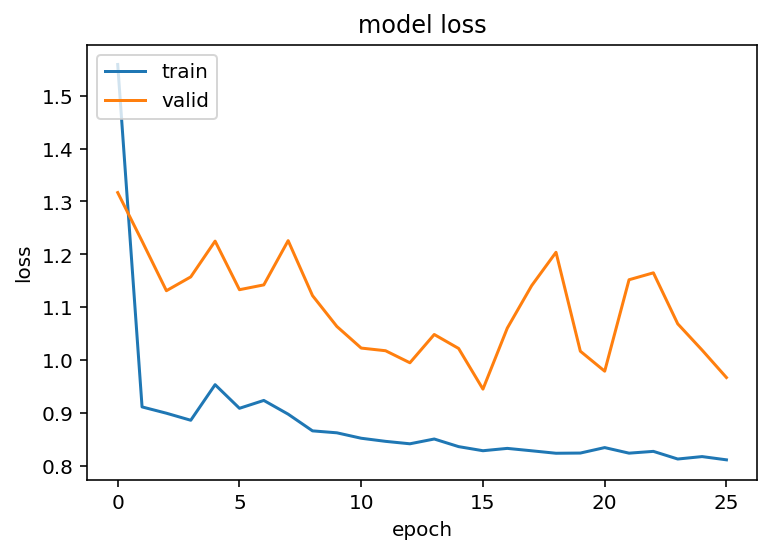

Wall time: 1min 6s


In [130]:
%%time
nn_model = mlp_model(w2v_sm_X_train_df)
train_model(nn_model, 'Word2Vec_MLP' ,w2v_sm_X_train_df, w2v_X_test_df, w2v_sm_y_train_df, w2v_y_test_df)
del nn_model

## Word2Vec + LSTM (81.50%)

Build model...
Using GPU
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
cu_dnnlstm (CuDNNLSTM)       (None, 128)               132096    
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 2,692,483
Trainable params: 2,692,483
Non-trainable params: 0
_________________________________________________________________
(29838, 300) (29838, 3)
(3724, 300) (3724, 3)
Train on 26854 samples, validate on 2984 samples
Epoch 1/100
26816/26854 [============================>.] - ETA: 0s - loss: 0.9519 - acc: 0.5273
Epoch 00001: val_acc improved from -inf to 0.56568, saving model to D:\Data\Oluwafemi\Word2Vec_LSTM.h5
26854/26854 [==============================] - 23s 849us/

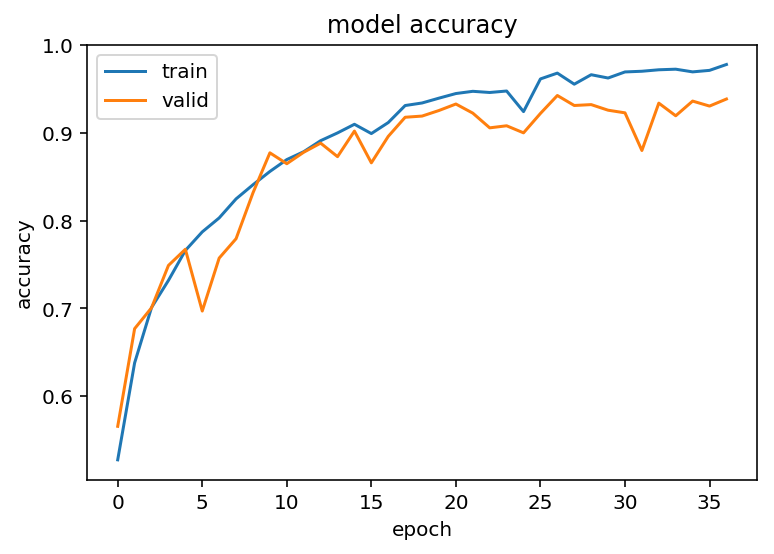

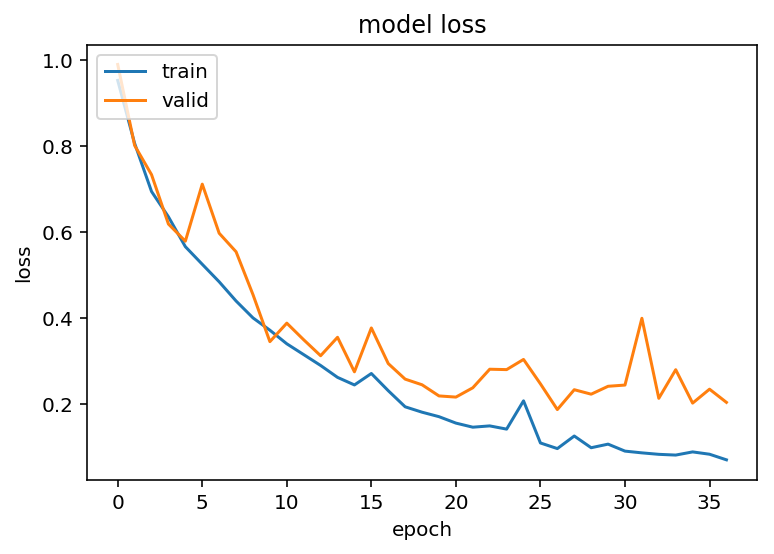

Wall time: 10min 38s


In [131]:
%%time
lstm = basic_LSTM()
train_model(lstm, "Word2Vec_LSTM", w2v_sm_X_train_df, w2v_X_test_df, w2v_sm_y_train_df, w2v_y_test_df)
del lstm

## Word2Vec + GRU (65.25%)

Build model...
Using GPU
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
cu_dnngru (CuDNNGRU)         (None, 128)               99072     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 2,659,459
Trainable params: 2,659,459
Non-trainable params: 0
_________________________________________________________________
(29838, 300) (29838, 3)
(3724, 300) (3724, 3)
Train on 26854 samples, validate on 2984 samples
Epoch 1/100
26816/26854 [============================>.] - ETA: 0s - loss: 0.9112 - acc: 0.5556
Epoch 00001: val_acc improved from -inf to 0.51910, saving model to D:\Data\Oluwafemi\Word2Vec_GRU.h5
26854/26854 [==============================] - 18s 657us/s

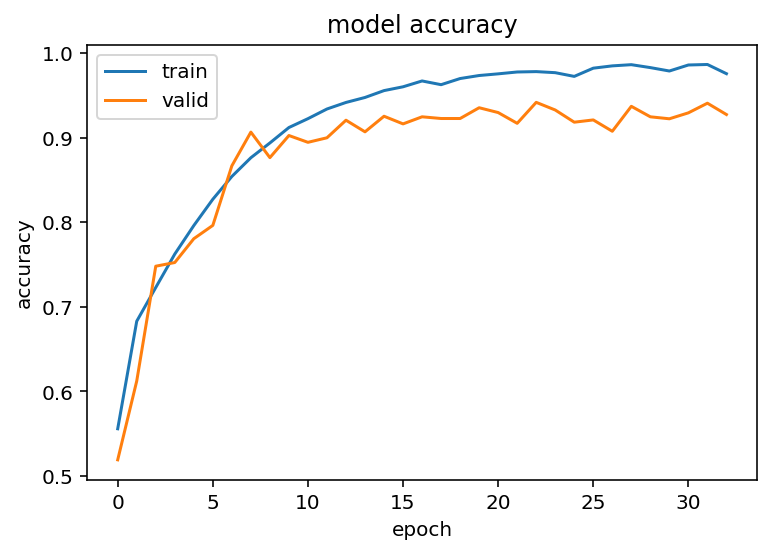

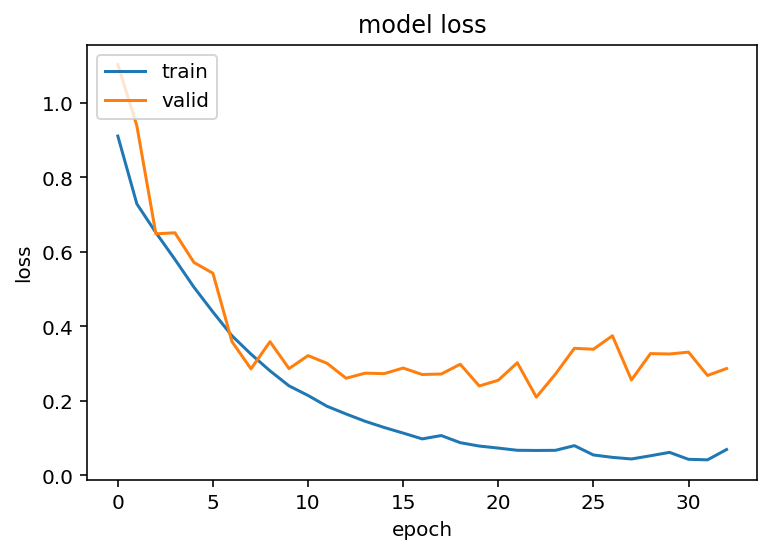

Wall time: 9min 20s


In [136]:
%%time
gru = basic_GRU()
train_model(gru, 'Word2Vec_GRU', w2v_sm_X_train_df, w2v_X_test_df, w2v_sm_y_train_df, w2v_y_test_df)
del gru

## Word2Vec + DoubleCNN (88.27%)

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          2560000   
_________________________________________________________________
conv1d (Conv1D)              (None, 296, 128)          82048     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 59, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 55, 128)           82048     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 2,724,483
Trainable params: 2,724,483
Non-trainable params: 0
_______________________________

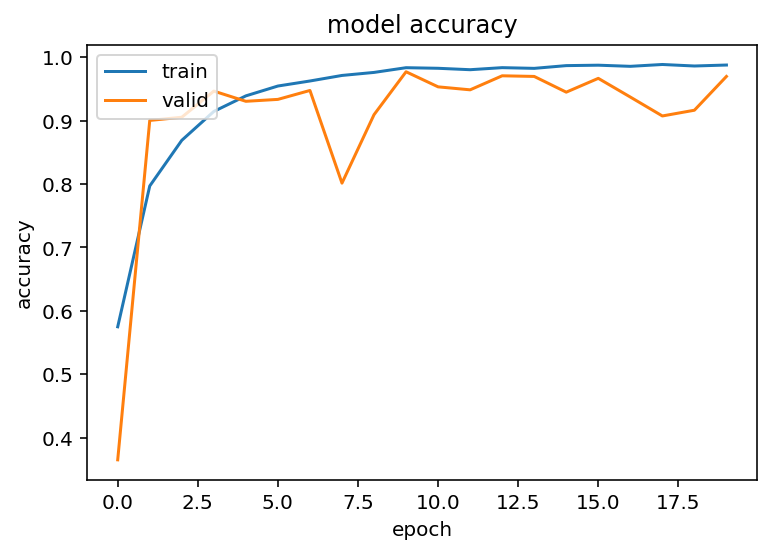

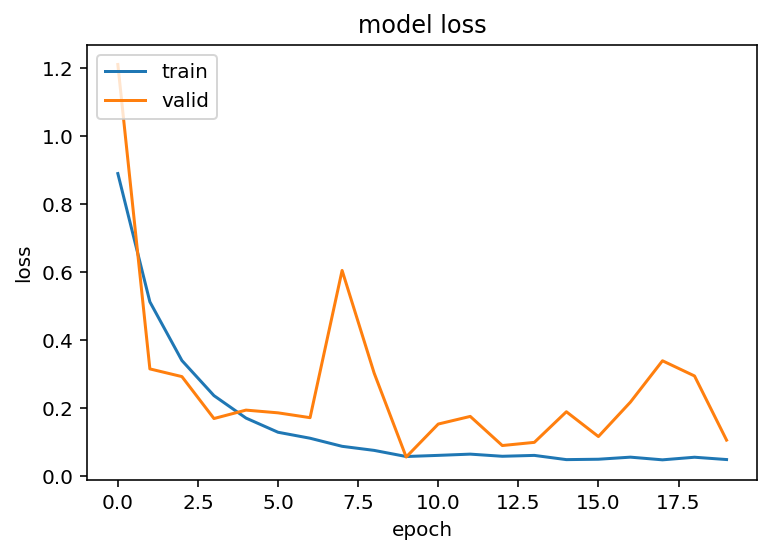

Wall time: 5min 45s


In [137]:
%%time
cnn = double_cnn(w2v_sm_X_train_df)
train_model(cnn, 'Word2Vec_double_CNN', w2v_sm_X_train_df, w2v_X_test_df, w2v_sm_y_train_df, w2v_y_test_df)
del cnn

## Word2Vec + DoubleLSTM (memory error - failed to finish)

In [ ]:
%%time
double_lstm = stack_LSTM(w2v_sm_X_train_df)
train_model(double_lstm, 'Word2Vec_double_LSTM', w2v_sm_X_train_df, w2v_X_test_df, w2v_sm_y_train_df, w2v_y_test_df)
del double_lstm

## Word2Vec + DoubleGRU (84.05%)

Build model...
Using GPU
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          2560000   
_________________________________________________________________
cu_dnngru (CuDNNGRU)         (None, 300, 128)          99072     
_________________________________________________________________
cu_dnngru_1 (CuDNNGRU)       (None, 128)               99072     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 2,758,531
Trainable params: 2,758,531
Non-trainable params: 0
_________________________________________________________________
(29838, 300) (29838, 3)
(3724, 300) (3724, 3)
Train on 26854 samples, validate on 2984 samples
Epoch 1/100
26816/26854 [============================>.] - ETA: 0s - loss: 0.8839 - acc: 0.5723
Epoch 00001: val_acc improve

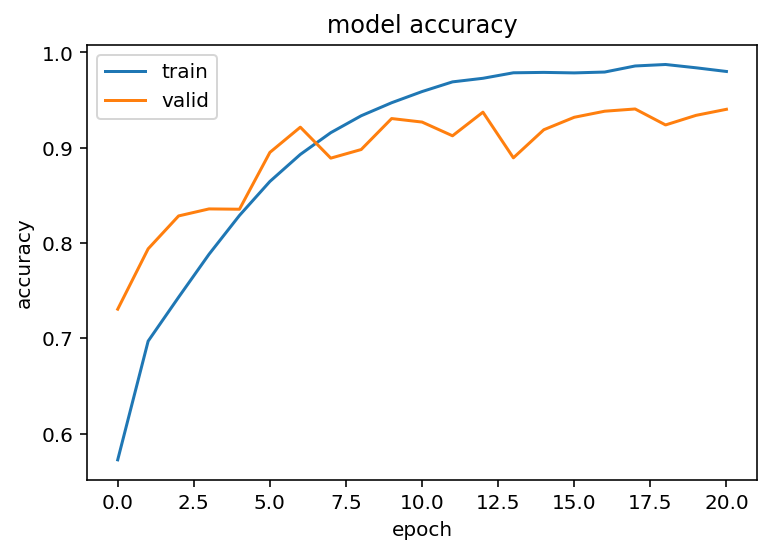

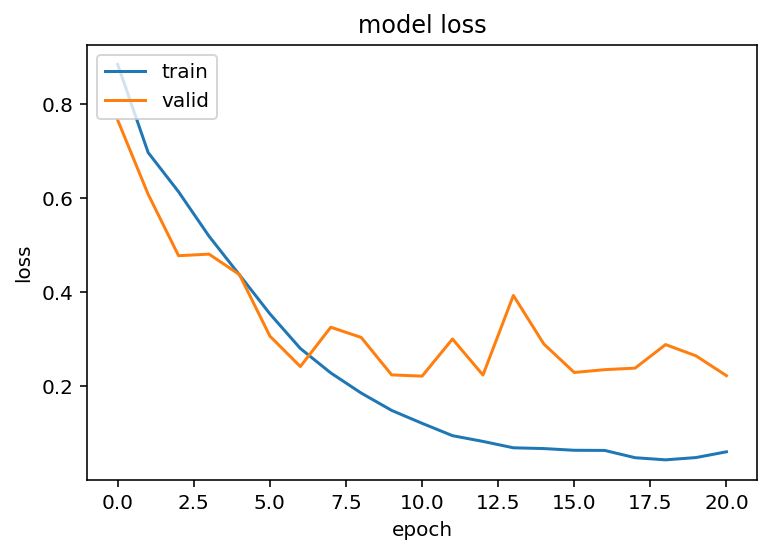

Wall time: 7min 43s


In [124]:
%%time
double_gru = stack_GRU(w2v_sm_X_train)
train_model(double_gru, 'Word2Vec_double_GRU', w2v_sm_X_train_df, w2v_X_test_df, w2v_sm_y_train_df, w2v_y_test_df)
del double_gru

## Word2Vec + BiLSTM (64.74%)

Build model...
Using GPU
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 64)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 1,346,947
Trainable params: 1,346,947
Non-trainable params: 0
_________________________________________________________________
(29838, 300) (29838, 3)
(3724, 300) (3724, 3)
Train on 26854 samples, validate on 2984 samples
Epoch 1/100
26816/26854 [============================>.] - ETA: 0s - loss: 0.8943 - acc: 0.5688
Epoch 00001: val_acc improved from -inf to 0.55328, saving model to D:\Data\Oluwafemi\Word2Vec_biLSTM.h5
26854/26854 [==============================] - 20s 749u

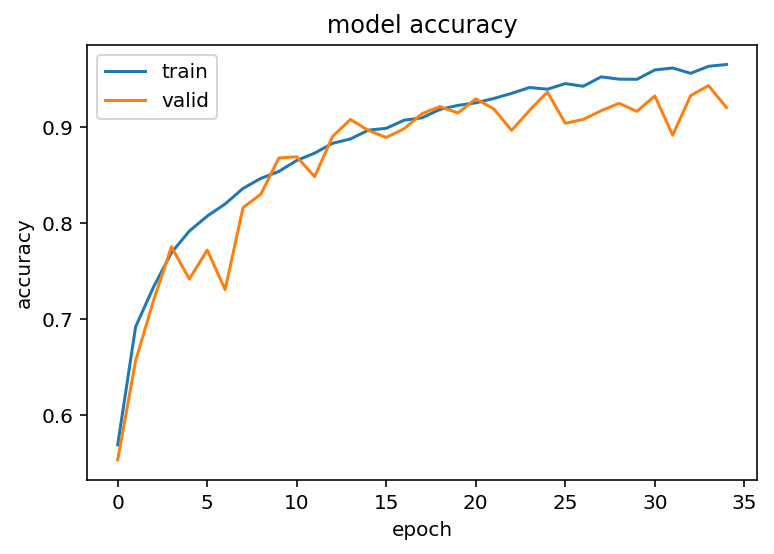

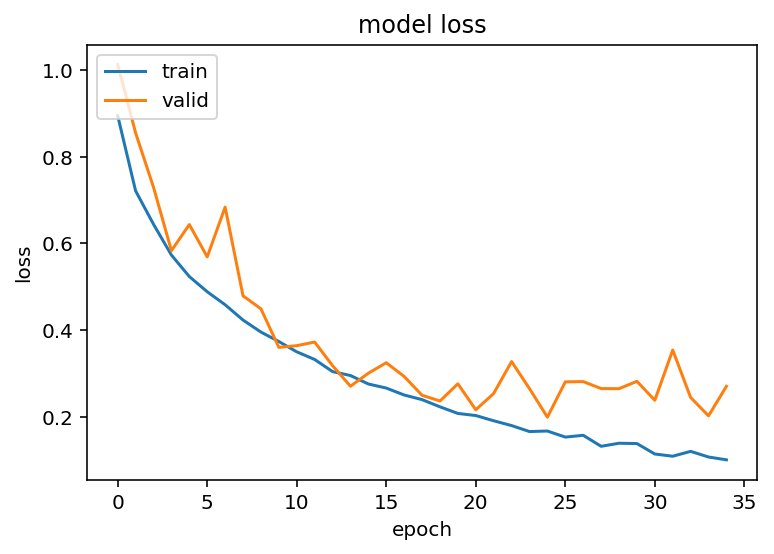

Wall time: 8min 46s


In [125]:
%%time
bilstm = bi_LSTM(w2v_sm_X_train)
train_model(bilstm, 'Word2Vec_biLSTM', w2v_sm_X_train_df, w2v_X_test_df, w2v_sm_y_train_df, w2v_y_test_df)
del bilstm

## Word2Vec + BiGRU (75.24%)

Build model...
Using GPU
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 64)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49920     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 1,330,307
Trainable params: 1,330,307
Non-trainable params: 0
_________________________________________________________________
(29838, 300) (29838, 3)
(3724, 300) (3724, 3)
Train on 26854 samples, validate on 2984 samples
Epoch 1/100
26816/26854 [============================>.] - ETA: 0s - loss: 0.8949 - acc: 0.5662
Epoch 00001: val_acc improved from -inf to 0.66387, saving model to D:\Data\Oluwafemi\Word2Vec_biGRU.h5
26854/26854 [==============================] - 20s 746us

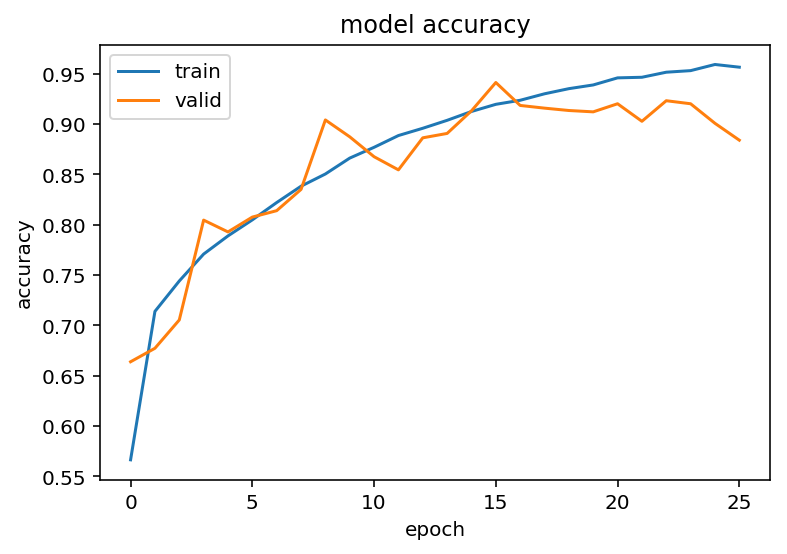

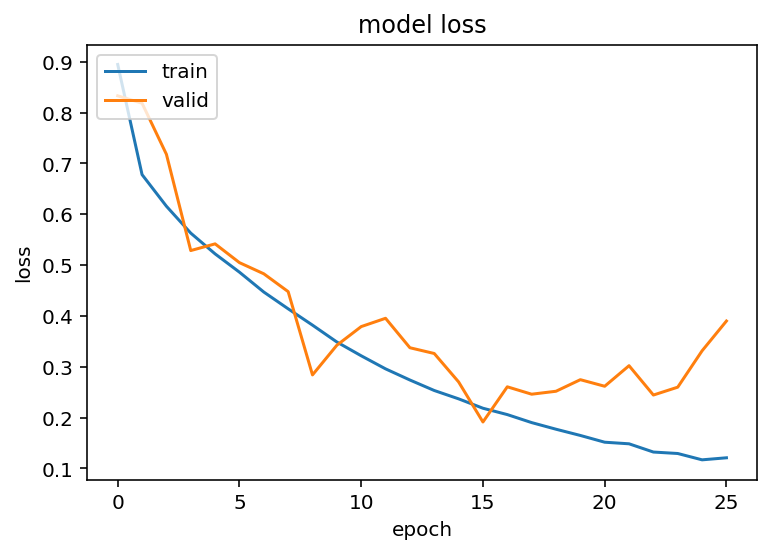

Wall time: 6min 21s


In [126]:
%%time
bigru = bi_GRU(w2v_sm_X_train_df)
train_model(bigru, 'Word2Vec_biGRU', w2v_sm_X_train_df, w2v_X_test_df, w2v_sm_y_train_df, w2v_y_test_df)
del bigru

## Word2Vec + CNN_LSTM (78.44%)

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          2560000   
_________________________________________________________________
conv1d (Conv1D)              (None, 296, 128)          82048     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 74, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 2,774,019
Trainable params: 2,774,019
Non-trainable params: 0
_________________________________________________________________
(29838, 300) (29838, 3)
(3724, 300) (3724, 3)
Train on 26854 samples, validate on 2984 samples
Ep

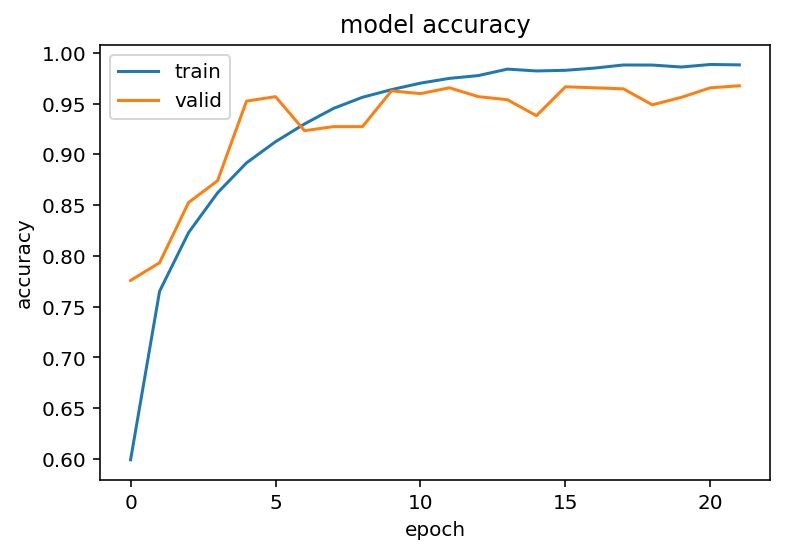

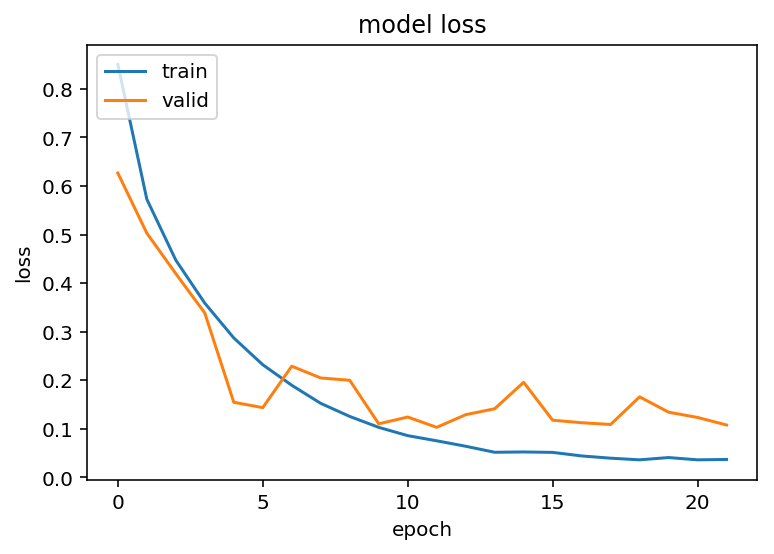

Wall time: 5min 40s


In [136]:
%%time
cnn_LSTM_model = CNN_LSTM(w2v_sm_X_train_df)
train_model(cnn_LSTM_model, 'Word2Vec_CNN_LSTM', w2v_sm_X_train_df, w2v_X_test_df, w2v_sm_y_train_df, w2v_y_test_df)
del cnn_LSTM_model

## Word2Vec + CNN_GRU (85.02%)

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          2560000   
_________________________________________________________________
conv1d (Conv1D)              (None, 296, 128)          82048     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 74, 128)           0         
_________________________________________________________________
gru (GRU)                    (None, 128)               99072     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 2,741,507
Trainable params: 2,741,507
Non-trainable params: 0
_________________________________________________________________
(29838, 300) (29838, 3)
(3724, 300) (3724, 3)
Train on 26854 samples, validate on 2984 samples
Ep

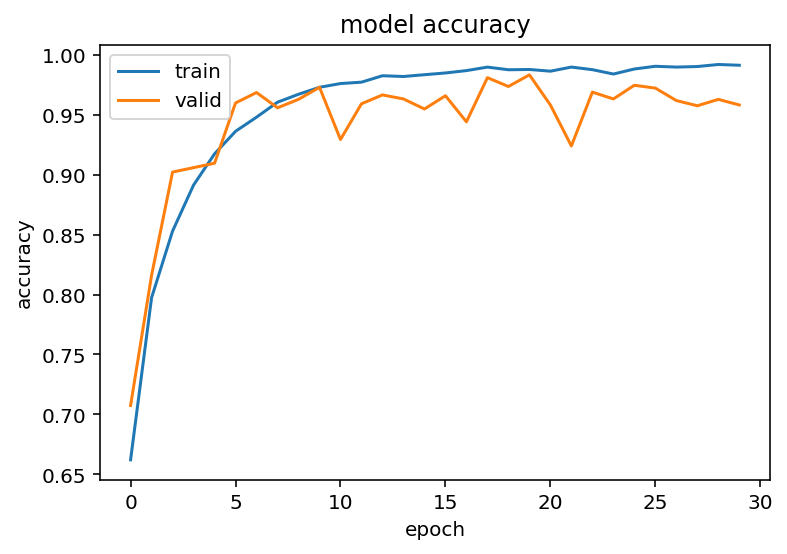

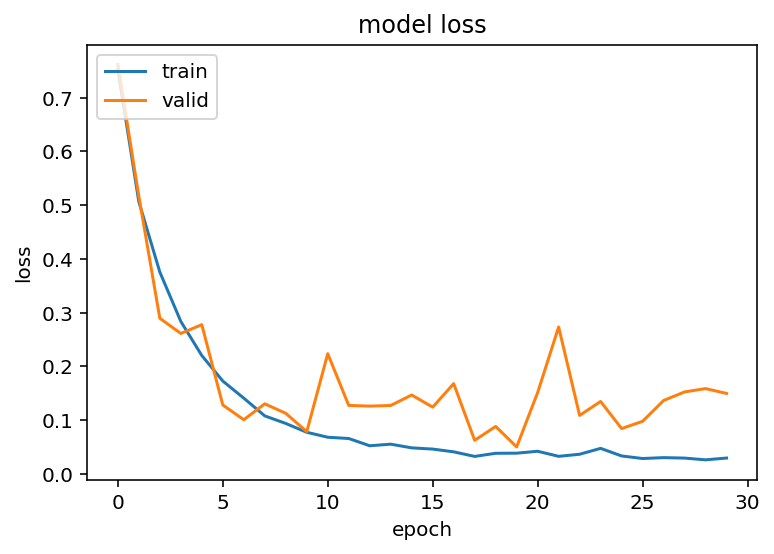

Wall time: 7min 39s


In [135]:
%%time
cnn_gru_model = CNN_GRU(w2v_sm_X_train_df)
train_model(cnn_gru_model, 'Word2Vec_CNN_GRU', w2v_sm_X_train_df, w2v_X_test_df, w2v_sm_y_train_df, w2v_y_test_df)
del cnn_gru_model

****

# Training: Doc2Vec Results

In [116]:
d2v_sm_X_train_df = pd.DataFrame(d2v_sm_X_train)
print(d2v_sm_X_train_df.shape)

d2v_X_test_df = pd.DataFrame(d2v_X_test)
print(d2v_X_test_df.shape)

(29838, 300)
(3724, 300)


In [117]:
print(collections.Counter(d2v_sm_y_train))
d2v_sm_y_train_df = pd.get_dummies(d2v_sm_y_train).values  # Convert categorical variable into dummy/indicator variables.
print(d2v_sm_y_train_df.shape)

print(collections.Counter(d2v_y_test))
d2v_y_test_df = pd.get_dummies(d2v_y_test).values  # Convert categorical variable into dummy/indicator variables.
print(d2v_y_test_df.shape)

Counter({1: 9946, 2: 9946, 3: 9946})
(29838, 3)
Counter({1: 3292, 2: 347, 3: 85})
(3724, 3)


### to avoid error: Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>

https://stackoverflow.com/questions/57874436/tensorflow-data-adapter-error-valueerror-failed-to-find-data-adapter-that-can

In [118]:
d2v_sm_X_train_df = np.asarray(d2v_sm_X_train_df)
d2v_X_test_df = np.asarray(d2v_X_test_df)

d2v_sm_y_train_df = np.asarray(d2v_sm_y_train_df)
d2v_y_test_df = np.asarray(d2v_y_test_df)

In [119]:
print(d2v_sm_X_train_df.shape)
print(d2v_X_test_df.shape)
print(d2v_sm_y_train_df.shape)
print(d2v_y_test_df.shape)

(29838, 300)
(3724, 300)
(29838, 3)
(3724, 3)


****

## Doc2Vec + MLP (88.40%)

Building model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               154112    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 155,651
Trainable params: 155,651
Non-trainable params: 0
_________________________________________________________________
(29838, 300) (29838, 3)
(3724, 300) (3724, 3)
Train on 26854 samples, validate on 2984 samples
Epo

c:\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


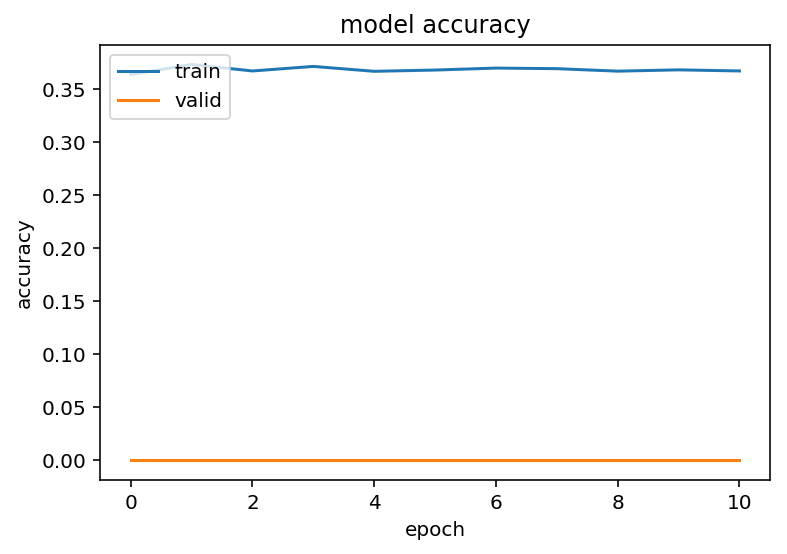

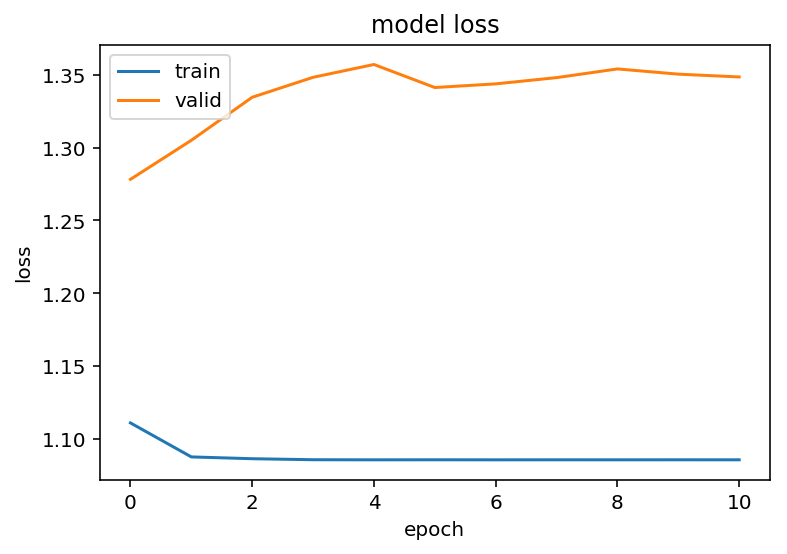

Wall time: 31.1 s


In [141]:
%%time
nn_model = mlp_model(d2v_sm_X_train_df)
train_model(nn_model, 'Doc2Vec_MLP', d2v_sm_X_train_df, d2v_X_test_df, d2v_sm_y_train_df, d2v_y_test_df)
del nn_model

## Doc2Vec + LSTM (69.47%)

Build model...
Using GPU
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
cu_dnnlstm (CuDNNLSTM)       (None, 128)               132096    
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 2,692,483
Trainable params: 2,692,483
Non-trainable params: 0
_________________________________________________________________
(29838, 300) (29838, 3)
(3724, 300) (3724, 3)
Train on 26854 samples, validate on 2984 samples
Epoch 1/100
26816/26854 [============================>.] - ETA: 0s - loss: 1.0870 - acc: 0.3724
Epoch 00001: val_acc improved from -inf to 0.00000, saving model to D:\Data\Oluwafemi\Doc2Vec_LSTM.h5
26854/26854 [==============================] - 22s 804us/s

c:\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


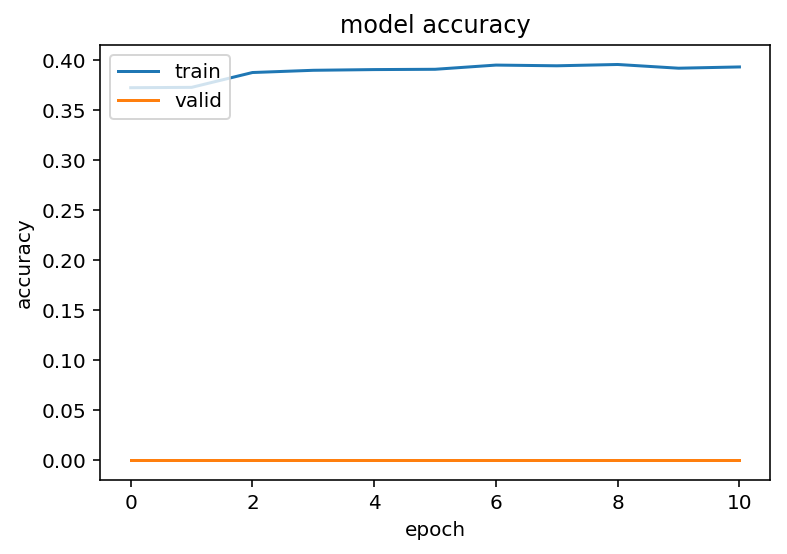

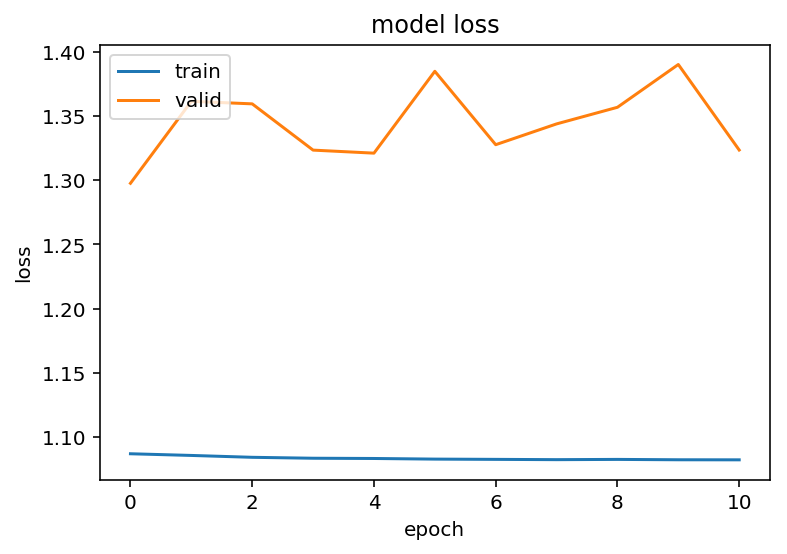

Wall time: 3min 16s


In [142]:
%%time
nn_model = basic_LSTM()
train_model(nn_model, 'Doc2Vec_LSTM', d2v_sm_X_train_df, d2v_X_test_df, d2v_sm_y_train_df, d2v_y_test_df)
del nn_model

## Doc2Vec + GRU (43.23%)

Build model...
Using GPU
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
cu_dnngru (CuDNNGRU)         (None, 128)               99072     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 2,659,459
Trainable params: 2,659,459
Non-trainable params: 0
_________________________________________________________________
(29838, 300) (29838, 3)
(3724, 300) (3724, 3)
Train on 26854 samples, validate on 2984 samples
Epoch 1/100
26816/26854 [============================>.] - ETA: 0s - loss: 1.0870 - acc: 0.3727
Epoch 00001: val_acc improved from -inf to 0.00000, saving model to D:\Data\Oluwafemi\Doc2Vec_GRU.h5
26854/26854 [==============================] - 17s 642us/sa

c:\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


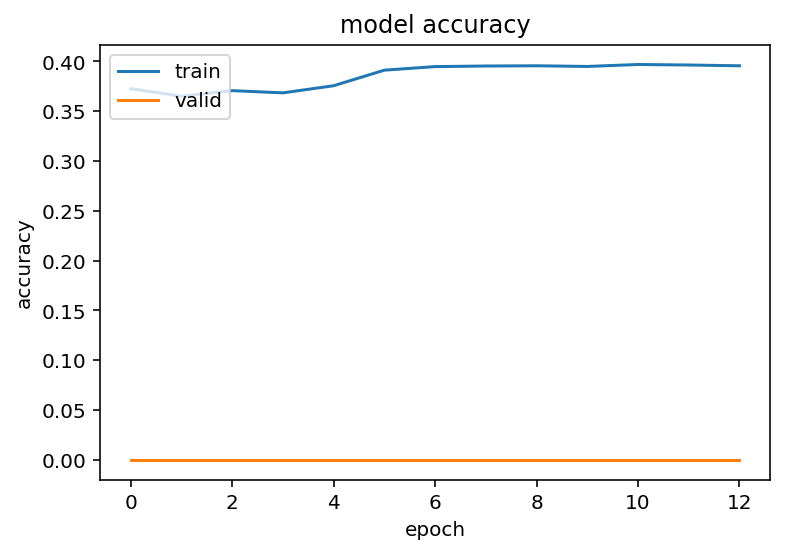

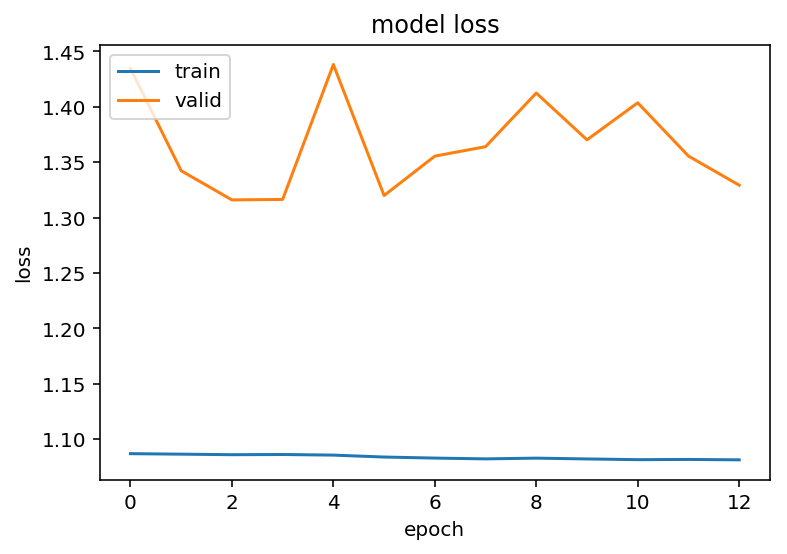

Wall time: 3min 41s


In [143]:
%%time
nn_model = basic_GRU()
train_model(nn_model, 'Doc2Vec_GRU', d2v_sm_X_train_df, d2v_X_test_df, d2v_sm_y_train_df, d2v_y_test_df)
del nn_model

## Doc2Vec + Double CNN (35.07%)

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          2560000   
_________________________________________________________________
conv1d (Conv1D)              (None, 296, 128)          82048     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 59, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 55, 128)           82048     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 2,724,483
Trainable params: 2,724,483
Non-trainable params: 0
_______________________________

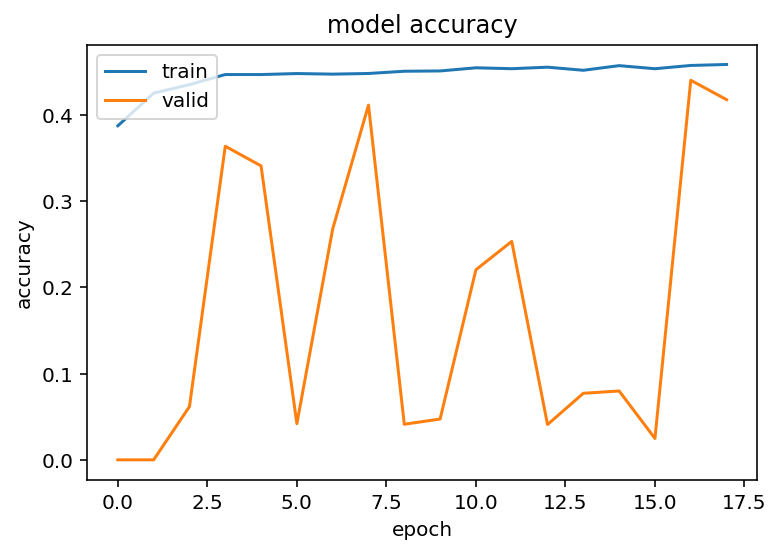

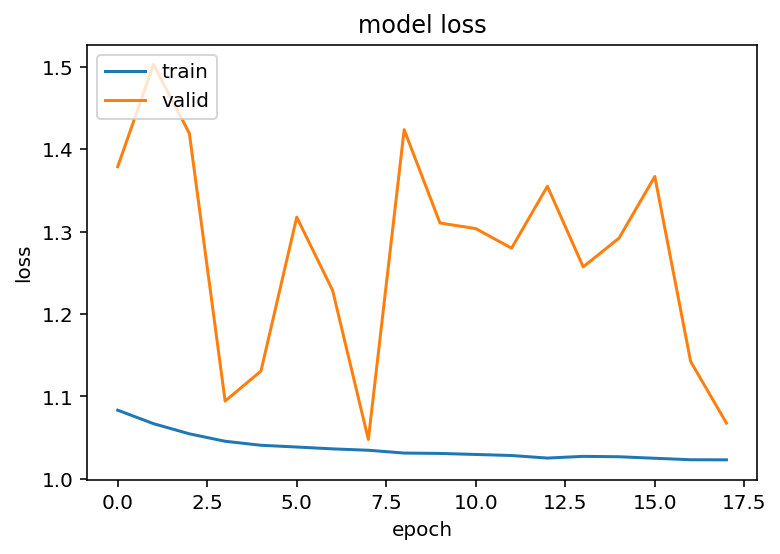

Wall time: 4min 22s


In [144]:
%%time
nn_model = double_cnn(d2v_sm_X_train_df)
train_model(nn_model, 'Doc2Vec_double_LSTM', d2v_sm_X_train_df, d2v_X_test_df, d2v_sm_y_train_df, d2v_y_test_df)
del nn_model

## Doc2Vec + Double LSTM (memory error - failed to finish)

## Doc2Vec + Double GRU (40.25%)

Build model...
Using GPU
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          2560000   
_________________________________________________________________
cu_dnngru (CuDNNGRU)         (None, 300, 128)          99072     
_________________________________________________________________
cu_dnngru_1 (CuDNNGRU)       (None, 128)               99072     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 2,758,531
Trainable params: 2,758,531
Non-trainable params: 0
_________________________________________________________________
(29838, 300) (29838, 3)
(3724, 300) (3724, 3)
Train on 26854 samples, validate on 2984 samples
Epoch 1/100
26752/26854 [============================>.] - ETA: 0s - loss: 1.0869 - acc: 0.3706
Epoch 00001: val_acc improve

c:\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


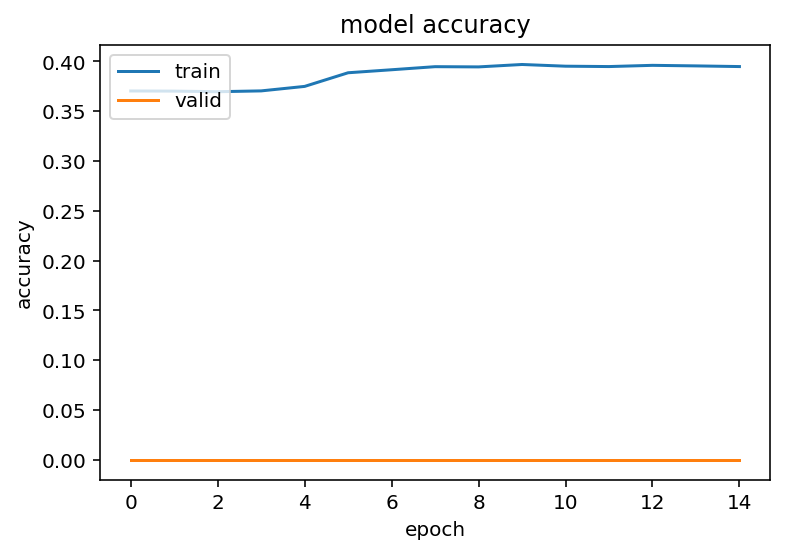

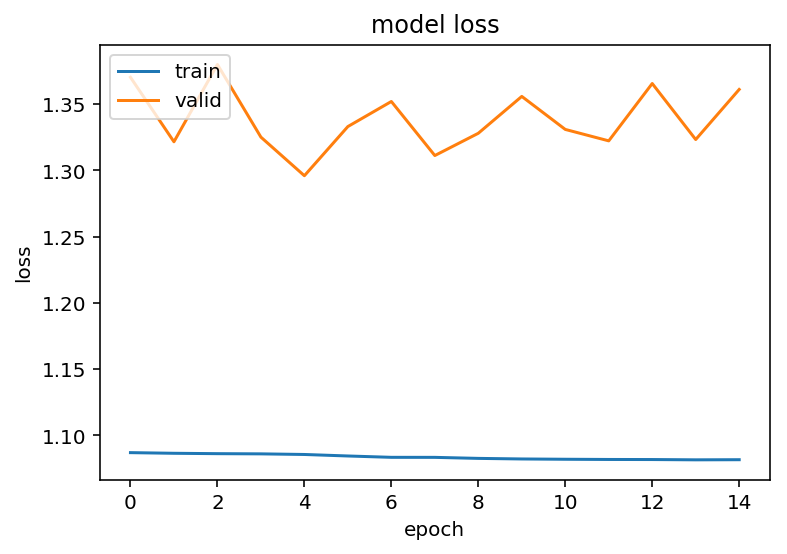

Wall time: 5min 33s


In [128]:
%%time
nn_model = stack_GRU(d2v_sm_X_train_df)
train_model(nn_model,'Doc2Vec_double_LSTM', d2v_sm_X_train_df, d2v_X_test_df, d2v_sm_y_train_df, d2v_y_test_df)
del nn_model

## Doc2Vec + BiLSTM (memory error - failed to finish)

## Doc2Vec + BiGRU (14.53%)

Build model...
Using GPU
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 64)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49920     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 1,330,307
Trainable params: 1,330,307
Non-trainable params: 0
_________________________________________________________________
(29838, 300) (29838, 3)
(3724, 300) (3724, 3)
Train on 26854 samples, validate on 2984 samples
Epoch 1/100
26816/26854 [============================>.] - ETA: 0s - loss: 1.0868 - acc: 0.3684
Epoch 00001: val_acc improved from -inf to 0.00000, saving model to D:\Data\Oluwafemi\Doc2Vec_double_LSTM.h5
26854/26854 [==============================] - 19s 

c:\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


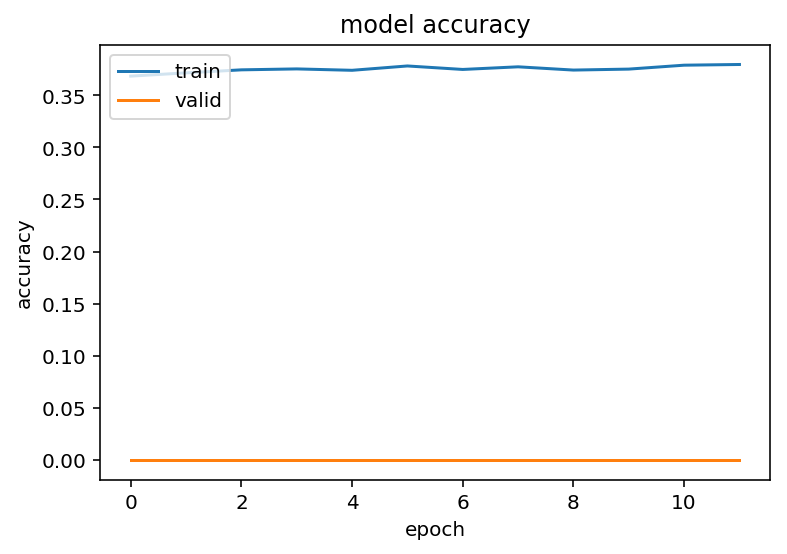

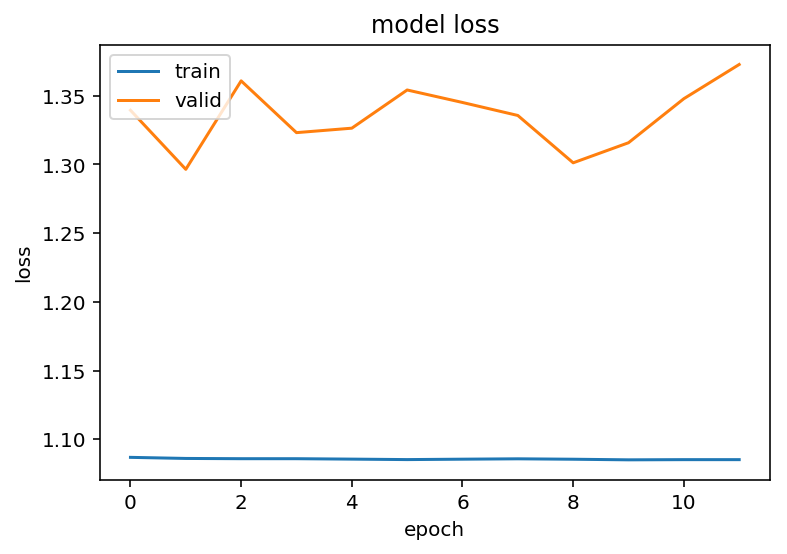

Wall time: 3min 1s


In [120]:
%%time
nn_model = bi_GRU(d2v_sm_X_train)
train_model(nn_model,'Doc2Vec_double_LSTM', d2v_sm_X_train_df, d2v_X_test_df, d2v_sm_y_train_df, d2v_y_test_df)
del nn_model

## Doc2Vec + CNN_LSTM (43.98%)

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          2560000   
_________________________________________________________________
conv1d (Conv1D)              (None, 296, 128)          82048     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 74, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 2,774,019
Trainable params: 2,774,019
Non-trainable params: 0
_________________________________________________________________
(29838, 300) (29838, 3)
(3724, 300) (3724, 3)
Train on 26854 samples, validate on 2984 samples
Ep

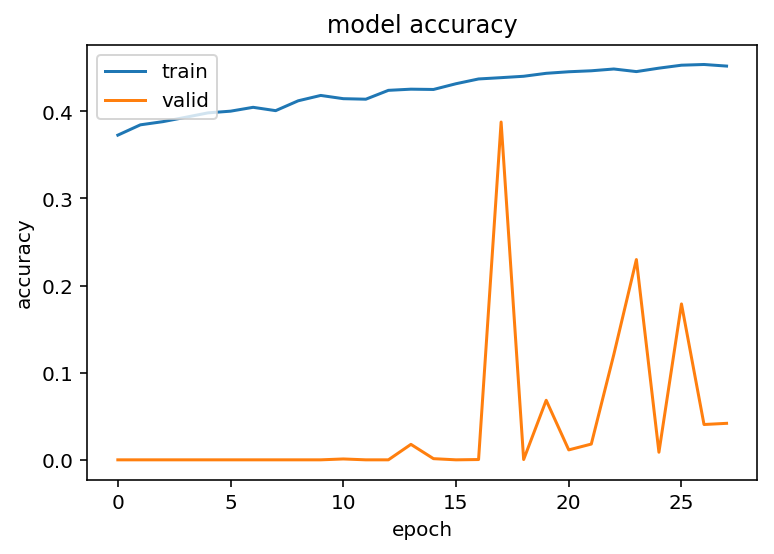

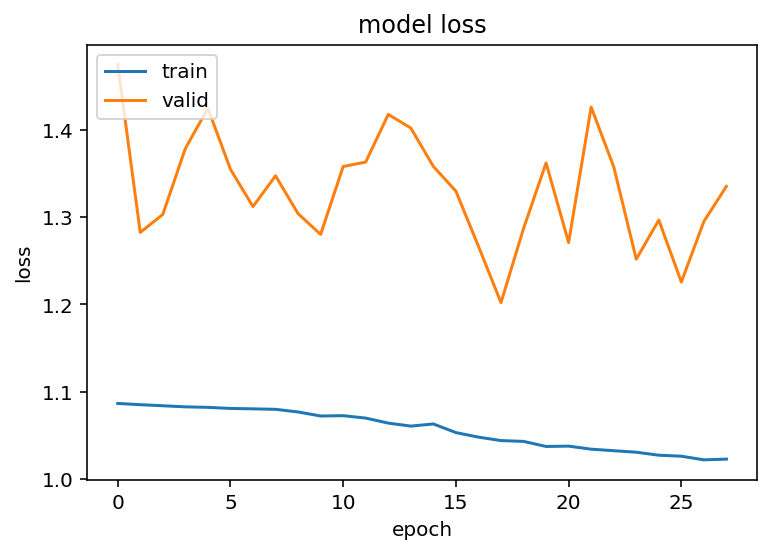

Wall time: 7min 3s


In [122]:
%%time
nn_model = CNN_LSTM(d2v_sm_X_train_df)
train_model(nn_model,'Doc2Vec_CNN_LSTM', d2v_sm_X_train_df, d2v_X_test_df, d2v_sm_y_train_df, d2v_y_test_df)
del nn_model

## Doc2Vec + CNN_GRU (46.78%)

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          2560000   
_________________________________________________________________
conv1d (Conv1D)              (None, 296, 128)          82048     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 74, 128)           0         
_________________________________________________________________
gru (GRU)                    (None, 128)               99072     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 2,741,507
Trainable params: 2,741,507
Non-trainable params: 0
_________________________________________________________________
(29838, 300) (29838, 3)
(3724, 300) (3724, 3)
Train on 26854 samples, validate on 2984 samples
Ep

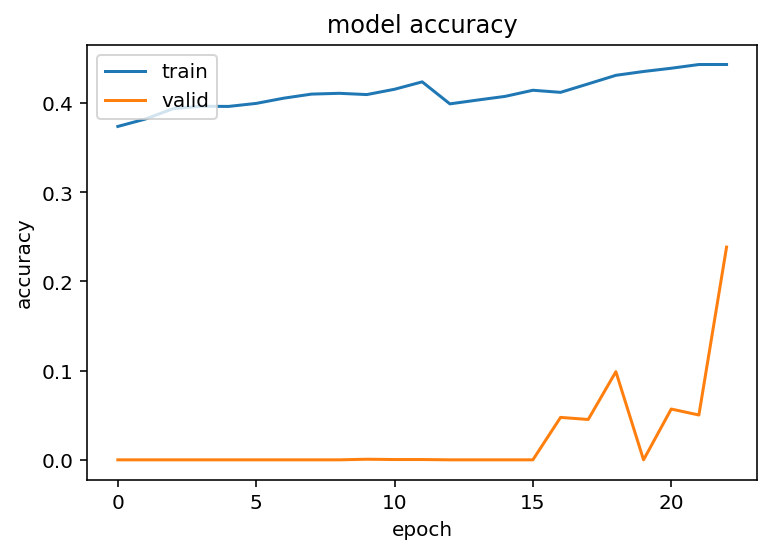

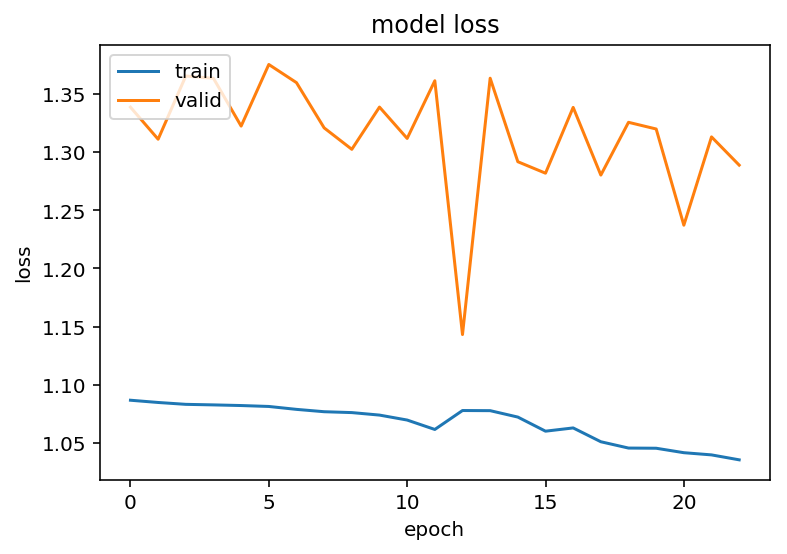

Wall time: 5min 48s


In [124]:
%%time
nn_model = CNN_GRU(d2v_sm_X_train_df)
train_model(nn_model,'Doc2Vec_CNN_GRU', d2v_sm_X_train_df, d2v_X_test_df, d2v_sm_y_train_df, d2v_y_test_df)
del nn_model

****

# GLOVE

In [ ]:
Xtrain, Xtest, Ytrain, Ytest
token = Tokenizer()
token.fit_on_texts(fas1)
seq = token.texts_to_sequences(fas1)
pad_seq_glove = pad_sequences(seq,maxlen=200)
sm = SMOTE()
pad_seq_G, y_train = sm.fit_sample(pad_seq_glove, y1)
vocab_size = len(token.word_index)+1
embedding_dim = 200
embedding_vector = {}
f = open('/home/oriolao/glove.twitter.27B.200d.txt')
for line in f:
    value = line.split(' ')
    word = value[0]
    coef = np.array(value[1:],dtype = 'float32')
    embedding_vector[word] = coef

embedding_matrix = np.zeros((vocab_size,128))
for word,i in token.word_index.items():
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

In [ ]:
pad_smglove, pad_smglove_test, yglove_train, yglove_test = train_test_split(pad_seq_G, y_train, test_size=0.25, random_state=0)

In [ ]:
print(collections.Counter(yglove_train))
Glove_y_Train = pd.get_dummies(yglove_train).values  # Convert categorical variable into dummy/indicator variables.
print(Glove_y_Train.shape)

print(collections.Counter(yglove_test))
Glove_y_Test = pd.get_dummies(yglove_test).values  # Convert categorical variable into dummy/indicator variables.
print(Glove_y_Test.shape)

In [ ]:
batch_size = 64
nb_epochs = 100
NO_CLASSES = 3
MAX_NUM_WORDS = 20000

In [ ]:
#def train_model(model, model_name, X, Y):
def train_model(model, model_name, pad_smglove, pad_smglove_test, Glove_y_Train, Glove_y_Test):
    
    mc = ModelCheckpoint('D:\\'+model_name+'.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    
    X = Word2Vec_X_Train.copy()
    Y = Word2Vec_y_Train.copy()
    X_test = Word2Vec_X_Test.copy()
    Y_test = Word2Vec_y_Test.copy()
    
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=0)
    
    print(X_train.shape, Y_train.shape)
    print(X_val.shape, Y_val.shape)
    print(X_test.shape, Y_test.shape)
    
    # Fit the model
    estimator=model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        shuffle=True,
                        epochs=nb_epochs,
                        verbose=1,
                        validation_data=(X_val, Y_val),
                        callbacks=[es, mc])

    scores = model.evaluate(X_test, Y_test, verbose=1)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    output_test = model.predict(X_test)
    final_pred = np.argmax(output_test, axis=1)
    org_y_label = [np.where(r==1)[0][0] for r in Y_test]
    
    print('')
    #print(org_y_label)
    results = confusion_matrix(org_y_label, final_pred)
    print(results)
    
    #Compute precision, recall, F-measure and support for each class
    #  average='macro'
    #  Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    #  The support is the number of occurrences of each class in y_true.
    
    precisions, recall, f1_score, true_sum = metrics.precision_recall_fscore_support(org_y_label, final_pred, average='macro')
    
    print('')    
    print('Classify NN Precision = %0.3f (STD +/- %0.2f)' % (np.mean(precisions), np.std(precisions) * 2)) 
    print('Classify NN Recall    = %0.3f (STD +/- %0.2f)' % (np.mean(recall), np.std(recall) * 2)) 
    print('Classify NN F1 Score  = %0.3f (STD +/- %0.2f)' % (np.mean(f1_score), np.std(f1_score) * 2)) 
    print('Classify NN y_true    = ', true_sum) 
    
    pred_indices = np.argmax(output_test, axis=1)
    classes = np.array(range(0,NO_CLASSES))
    preds = classes[pred_indices]
    
    print('')
    print('Log loss: {}'.format(log_loss(classes[np.argmax(Y_test, axis=1)], output_test)))
    print('Accuracy: {}'.format(accuracy_score(classes[np.argmax(Y_test, axis=1)], preds)))
    
    # summarize history for accuracy
    plt.plot(estimator.history['acc'])
    plt.plot(estimator.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(estimator.history['loss'])
    plt.plot(estimator.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

## MLP_GLOVE

In [ ]:
# MLP +Glove
def MLP_model_glove(embedding_dim, embedding_matrix, train=True):
    
    K.clear_session()
    
    print('Build model...',embedding_matrix.shape[0], embedding_matrix.shape[1])
    model = Sequential()
    model.add(Embedding(
        input_dim = embedding_matrix.shape[0],
        output_dim = embedding_matrix.shape[1], 
        input_length = X.shape[1]))
    model.add(Dense(NO_CLASSES, activation='softmax'))
    
    #Setting this to False makes sure the Embedding layer is non-trainable when calling it. 
    #If you were to set trainable = True, then it will allow the optimization algorithm to 
    #modify the values of the word embeddings. Pretrained parts shouldn't be updated be during training, 
    #to avoid them forgetting what they already "know".
    
    # pre-trained GLoVE embeddings
    model.layers[0].set_weights([embedding_matrix])
    model.layers[0].trainable = train
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    
    return model    

In [ ]:
%%time
nn_model = mlp_model_glove(pad_seq_G)
train_model(nn_model,pad_seq_smglove, Glove_y_Train)

In [ ]:
# CNN +Glove
def cnn_model_glove(embedding_dim, embedding_matrix, train=True):
    
    K.clear_session()

    # Convolution
    filters = 128
    kernel_size = 5
    
    print('Build model...',embedding_matrix.shape[0], embedding_matrix.shape[1])
    model = Sequential()
    model.add(Embedding(
        input_dim = embedding_matrix.shape[0],
        output_dim = embedding_matrix.shape[1], 
        input_length = X.shape[1]))
         
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(NO_CLASSES, activation='softmax'))
    
    #Setting this to False makes sure the Embedding layer is non-trainable when calling it. 
    #If you were to set trainable = True, then it will allow the optimization algorithm to 
    #modify the values of the word embeddings. Pretrained parts shouldn't be updated be during training, 
    #to avoid them forgetting what they already "know".
    
    # pre-trained GLoVE embeddings
    model.layers[0].set_weights([embedding_matrix])
    model.layers[0].trainable = train
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    
    return model    

In [ ]:
#CNN +Glove
%%time
cnn_model = cnn_model_glove(embedding_dim, embedding_matrix, train=True)
train_model(cnn_model, pad_seq_smglove, Glove_y_Train)

In [ ]:
#LSTM+ Glove
def LSTM_glove(embedding_dim, embedding_matrix, train=True):
    
    K.clear_session()
    LENGHT=X.shape[1]
    model = Sequential()
    model.add(Embedding(vocab_size,128,weights = [embedding_matrix],input_length=LENGTH,trainable = True))
    model.add(CuDNNLSTM(LENGTH))
    model.add(Dense(NO_CLASSES, activation='softmax'))   
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])
    print(model.summary())

In [ ]:
#LSTM+Glove
%%time
LSTM_train_model = LSTM_glove(embedding_dim, embedding_matrix, train=True)
train_model(LSTM_train_model, pad_seq_smglove, Glove_y_Train)

In [ ]:
#GRU+ Glove
def GRU_glove(embedding_dim, embedding_matrix, train=True):
    
    K.clear_session()
    LENGHT=X.shape[1]
    model = Sequential()
    model.add(Embedding(vocab_size,128,weights = [embedding_matrix],input_length=LENGTH,trainable = True))
    model.add(CuDNNGRU(LENGTH))
    model.add(Dense(NO_CLASSES, activation='softmax'))   
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])
    print(model.summary())

In [ ]:
#GRU +Glove
%%time
GRU_train_model = GRU_glove(embedding_dim, embedding_matrix, train=True)
train_model(GRU_train_model, pad_seq_smglove, Glove_y_Train)

In [ ]:
#BiLSTM+ Glove
def BiLSTM_glove(embedding_dim, embedding_matrix, train=True):
    
    K.clear_session()
    LSTM_SIZE = 64
    LENGHT=X.shape[1]
    model = Sequential()
    model.add(Embedding(vocab_size,LSTM_SIZE,weights = [embedding_matrix],input_length=LENGTH,trainable = True))
    model.add(Bidirectional(CuDNNLSTM(LSTM_SIZE)))
    model.add(Dense(NO_CLASSES, activation='softmax'))   
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])
    print(model.summary())

In [ ]:
#BiLSTM +Glove
%%time
LSTM_train_model = LSTM_glove(embedding_dim, embedding_matrix, train=True)
train_model(LSTM_train_model, pad_seq_smglove, Glove_y_Train)

In [ ]:
#BiGRU+ Glove
def BiGRU_glove(embedding_dim, embedding_matrix, train=True):
    
    K.clear_session()
    LSTM_SIZE = 64
    LENGHT=X.shape[1]
    model = Sequential()
    model.add(Embedding(vocab_size,LSTM_SIZE,weights = [embedding_matrix],input_length=LENGTH,trainable = True))
    model.add(Bidirectional(CuDNNGRU(LSTM_SIZE)))
    model.add(Dense(NO_CLASSES, activation='softmax'))   
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])
    print(model.summary())

In [ ]:
#BiGRU +Glove
%%time
BiGRU_train_model = BiGRU_glove(embedding_dim, embedding_matrix, train=True)
train_model(BiGRU_train_model, pad_seq_smglove, Glove_y_Train)

In [ ]:
# DoubleCNN +Glove
def double_cnn_model_glove(embedding_dim, embedding_matrix, train=True):
    
    K.clear_session()

    # Convolution
    filters = 128
    kernel_size = 5
    DEPTH=64
    
    print('Build model...',embedding_matrix.shape[0], embedding_matrix.shape[1])
    model = Sequential()
    model.add(Embedding(
        input_dim = embedding_matrix.shape[0],
        output_dim = embedding_matrix.shape[1], 
        input_length = X.shape[1]))
    model.add(Conv1D(DEPTH, kernel_size, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(Conv1D(DEPTH, kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(NO_CLASSES, activation='softmax'))
    
    #Setting this to False makes sure the Embedding layer is non-trainable when calling it. 
    #If you were to set trainable = True, then it will allow the optimization algorithm to 
    #modify the values of the word embeddings. Pretrained parts shouldn't be updated be during training, 
    #to avoid them forgetting what they already "know".
    
    # pre-trained GLoVE embeddings
    model.layers[0].set_weights([embedding_matrix])
    model.layers[0].trainable = train
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    
    return model    

In [ ]:
# DoubleCNN +Glove
double_cnn_train_model = double_cnn_model_glove(embedding_dim, embedding_matrix, train=True)
train_model(double_cnn_train_model, pad_seq_smglove, Glove_y_Train)

In [ ]:
#Stack_LSTM+ Glove
def stack_LSTM_glove(embedding_dim, embedding_matrix, train=True):
    K.clear_session()
    model = Sequential()
    LENGTH = X.shape[1]
    model.add(Embedding(vocab_size,128,weights = [embedding_matrix],input_length=LENGTH,trainable = True))
    model.add(CuDNNLSTM(LENGTH, return_sequences=True))
    model.add(CuDNNLSTM(LENGTH))
    model.add(Dense(NO_CLASSES, activation='softmax'))   
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])
    print(model.summary())

In [ ]:
#Stack_LSTM+Glove
%%time
stack_LSTM_train_model = stack_LSTM_glove(embedding_dim, embedding_matrix, train=True)
train_model(stack_LSTM_train_model, pad_seq_smglove, Glove_y_Train)

In [ ]:
#Stack_GRU+ Glove
def stack_GRU_glove(embedding_dim, embedding_matrix, train=True):
    K.clear_session()
    model = Sequential()
    LENGTH = X.shape[1]
    model.add(Embedding(vocab_size,128,weights = [embedding_matrix],input_length=LENGTH,trainable = True))
    model.add(CuDNNGRU(LENGTH, return_sequences=True))
    model.add(CuDNNGRU(LENGTH))
    model.add(Dense(NO_CLASSES, activation='softmax'))   
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])
    print(model.summary())

In [ ]:
#Stack_GRU+Glove
%%time
stack_GRU_train_model = stack_GRU_glove(embedding_dim, embedding_matrix, train=True)
train_model(stack_GRU_train_model, pad_seq_smglove, Glove_y_Train)

In [ ]:
#CNN_LSTM+Glove
def CNN_LSTM_glove(embedding_dim, embedding_matrix, train=True):
    
    K.clear_session()
    LENGHT=X.shape[1]
    DEPTH=128
    # Convolution
    kernel_size = 5
    filters = 64
    pool_size = 4
    print('Build model...')
    model = Sequential()
    model.add(Embedding(vocab_size,DEPTH,weights = [embedding_matrix],input_length=LENGTH,trainable = True))
    model.add(Conv1D(DEPTH,
                     kernel_size,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(CuDNNLSTM(DEPTH))
    model.add(Dense(NO_CLASSES, activation='softmax'))   
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])
    print(model.summary())

In [ ]:
#CNN_LSTM+Glove
%%time
CNN_LSTM_train_model = CNN_LSTM_glove(embedding_dim, embedding_matrix, train=True)
train_model(CNN_LSTM_train_model, pad_seq_smglove, Glove_y_Train)

In [ ]:
#CNN_GRU+Glove
def CNN_GRU_glove(embedding_dim, embedding_matrix, train=True):
    
    K.clear_session()
    LENGHT=X.shape[1]
    DEPTH=128
    # Convolution
    kernel_size = 5
    filters = 64
    pool_size = 4
    print('Build model...')
    model = Sequential()
    model.add(Embedding(vocab_size,DEPTH,weights = [embedding_matrix],input_length=LENGTH,trainable = True))
    model.add(Conv1D(DEPTH,
                     kernel_size,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(CuDNNGRU(DEPTH))
    model.add(Dense(NO_CLASSES, activation='softmax'))   
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])
    print(model.summary())

In [ ]:
#CNN_GRU+Glove
%%time
CNN_GRU_train_model = CNN_GRU_glove(embedding_dim, embedding_matrix, train=True)
train_model(CNN_GRU_train_model, pad_seq_smglove, Glove_y_Train)

# WORD_NGRAM

In [ ]:
Word_y_Train = pd.get_dummies(sm_ytrain_word).values  # Convert categorical variable into dummy/indicator variables.
print(Word_y_Train.shape)
Word_y_Test = pd.get_dummies(Ytest).values  # Convert categorical variable into dummy/indicator variables.
print(Word_y_Test.shape)

In [ ]:
#def train_model(model, model_name, X, Y):
def train_model_word(model, model_name, sm_train_word, pad_seq_test_word, Word_y_Train, Word_y_Test):
    
    mc = ModelCheckpoint('D:\\'+model_name+'.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    
    X = Word2Vec_X_Train.copy()
    Y = Word2Vec_y_Train.copy()
    X_test = Word2Vec_X_Test.copy()
    Y_test = Word2Vec_y_Test.copy()
    
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=0)
    
    print(X_train.shape, Y_train.shape)
    print(X_val.shape, Y_val.shape)
    print(X_test.shape, Y_test.shape)
    
    # Fit the model
    estimator=model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        shuffle=True,
                        epochs=nb_epochs,
                        verbose=1,
                        validation_data=(X_val, Y_val),
                        callbacks=[es, mc])

    scores = model.evaluate(X_test, Y_test, verbose=1)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    output_test = model.predict(X_test)
    final_pred = np.argmax(output_test, axis=1)
    org_y_label = [np.where(r==1)[0][0] for r in Y_test]
    
    print('')
    #print(org_y_label)
    results = confusion_matrix(org_y_label, final_pred)
    print(results)
    
    #Compute precision, recall, F-measure and support for each class
    #  average='macro'
    #  Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    #  The support is the number of occurrences of each class in y_true.
    
    precisions, recall, f1_score, true_sum = metrics.precision_recall_fscore_support(org_y_label, final_pred, average='macro')
    
    print('')    
    print('Classify NN Precision = %0.3f (STD +/- %0.2f)' % (np.mean(precisions), np.std(precisions) * 2)) 
    print('Classify NN Recall    = %0.3f (STD +/- %0.2f)' % (np.mean(recall), np.std(recall) * 2)) 
    print('Classify NN F1 Score  = %0.3f (STD +/- %0.2f)' % (np.mean(f1_score), np.std(f1_score) * 2)) 
    print('Classify NN y_true    = ', true_sum) 
    
    pred_indices = np.argmax(output_test, axis=1)
    classes = np.array(range(0,NO_CLASSES))
    preds = classes[pred_indices]
    
    print('')
    print('Log loss: {}'.format(log_loss(classes[np.argmax(Y_test, axis=1)], output_test)))
    print('Accuracy: {}'.format(accuracy_score(classes[np.argmax(Y_test, axis=1)], preds)))
    
    # summarize history for accuracy
    plt.plot(estimator.history['acc'])
    plt.plot(estimator.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(estimator.history['loss'])
    plt.plot(estimator.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

In [ ]:
# MLP + Word
%%time
nn_model_word = mlp_model(pad_seq_train_word)

train_model_word(nn_model_word, 'Word_MLP', sm_train_word, pad_seq_test_word, Word_y_Train, Word_y_Test)

In [ ]:
#LSTM +Word
%%time
lstm_word = basic_LSTM()
train_model_word(lstm_word, "Word_LSTM", sm_train_word, pad_seq_test_word, Word_y_Train, Word_y_Test)

In [ ]:
#GRU + Word
%%time
gru_word = basic_GRU()
train_model_word(gru_word, 'Word_GRU', sm_train_word, pad_seq_test_word, Word_y_Train, Word_y_Test)

In [ ]:
# double_CNN + Word
%%time
double_cnn_word = double_cnn()
train_model_word(double_cnn_word, 'Word_doublecnn', sm_train_word, pad_seq_test_word, Word_y_Train, Word_y_Test)

In [ ]:
#double_LSTM + Word
%%time
double_lstm_word = double_LSTM()
train_model_word(double_lstm_word, 'Word_double_LSTM', sm_train_word, pad_seq_test_word, Word_y_Train, Word_y_Test)

In [ ]:
# double_GRU + Word
%%time
double_gru_word = stack_GRU()
train_model_word(double_gru_word, 'Word_double_GRU', sm_train_word, pad_seq_test_word, Word_y_Train, Word_y_Test)

In [ ]:
# biLSTM +Word
%%time
bilstm_word = bi_LSTM()
train_model_word(bilstm_word, 'Word_biLSTM', sm_train_word, pad_seq_test_word, Word_y_Train, Word_y_Test)

In [ ]:
#biGRU + Word
%%time
bi_gru_word = bi_GRU()
train_model_word(bi_gru_word, 'Word_biGRU', sm_train_word, pad_seq_test_word, Word_y_Train, Word_y_Test)

In [ ]:
#CNN_LSTM + Word
%%time
cnn_LSTM_model_word = CNN_LSTM()
train_model_word(cnn_LSTM_model_word, 'Word_CNN_LSTM', sm_train_word, pad_seq_test_word, Word_y_Train, Word_y_Test)

In [ ]:
#CNN_GRU + Word
%%time
cnn_gru_model_word = CNN_GRU()
train_model_word(cnn_gru_model_word, 'Word_CNN_GRU', sm_train_word, pad_seq_test_word, Word_y_Train, Word_y_Test)

# Char N-Gram

In [ ]:
Char_y_Train = pd.get_dummies(sm_ytrain_char).values  # Convert categorical variable into dummy/indicator variables.
print(Char_y_Train.shape)
Char_y_Test = pd.get_dummies(Ytest).values  # Convert categorical variable into dummy/indicator variables.
print(Char_y_Test.shape)

In [ ]:
#def train_model(model, model_name, X, Y):
def train_model_char(model, model_name, sm_train_char, pad_seq_test_char, Char_y_Train, Char_y_Test):
    
    mc = ModelCheckpoint('D:\\'+model_name+'.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    
    X = Word2Vec_X_Train.copy()
    Y = Word2Vec_y_Train.copy()
    X_test = Word2Vec_X_Test.copy()
    Y_test = Word2Vec_y_Test.copy()
    
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=0)
    
    print(X_train.shape, Y_train.shape)
    print(X_val.shape, Y_val.shape)
    print(X_test.shape, Y_test.shape)
    
    # Fit the model
    estimator=model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        shuffle=True,
                        epochs=nb_epochs,
                        verbose=1,
                        validation_data=(X_val, Y_val),
                        callbacks=[es, mc])

    scores = model.evaluate(X_test, Y_test, verbose=1)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    output_test = model.predict(X_test)
    final_pred = np.argmax(output_test, axis=1)
    org_y_label = [np.where(r==1)[0][0] for r in Y_test]
    
    print('')
    #print(org_y_label)
    results = confusion_matrix(org_y_label, final_pred)
    print(results)
    
    #Compute precision, recall, F-measure and support for each class
    #  average='macro'
    #  Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    #  The support is the number of occurrences of each class in y_true.
    
    precisions, recall, f1_score, true_sum = metrics.precision_recall_fscore_support(org_y_label, final_pred, average='macro')
    
    print('')    
    print('Classify NN Precision = %0.3f (STD +/- %0.2f)' % (np.mean(precisions), np.std(precisions) * 2)) 
    print('Classify NN Recall    = %0.3f (STD +/- %0.2f)' % (np.mean(recall), np.std(recall) * 2)) 
    print('Classify NN F1 Score  = %0.3f (STD +/- %0.2f)' % (np.mean(f1_score), np.std(f1_score) * 2)) 
    print('Classify NN y_true    = ', true_sum) 
    
    pred_indices = np.argmax(output_test, axis=1)
    classes = np.array(range(0,NO_CLASSES))
    preds = classes[pred_indices]
    
    print('')
    print('Log loss: {}'.format(log_loss(classes[np.argmax(Y_test, axis=1)], output_test)))
    print('Accuracy: {}'.format(accuracy_score(classes[np.argmax(Y_test, axis=1)], preds)))
    
    # summarize history for accuracy
    plt.plot(estimator.history['acc'])
    plt.plot(estimator.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(estimator.history['loss'])
    plt.plot(estimator.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

In [ ]:
# MLP + char
%%time
nn_model_char = mlp_model(pad_seq_train_char)

train_model_char(nn_model_char, 'Char_MLP', sm_train_char, pad_seq_test_char, Char_y_Train, Char_y_Test)

In [ ]:
#LSTM +Char
%%time
lstm_char = basic_LSTM()
train_model_char(lstm_char, "Word_LSTM", sm_train_char, pad_seq_test_char, Char_y_Train, Char_y_Test)

In [ ]:
#GRU + char
%%time
gru_char = basic_GRU()
train_model_char(gru_char, 'Char_GRU', sm_train_char, pad_seq_test_char, Char_y_Train, Char_y_Test)

In [ ]:
# double_CNN + char
%%time
double_cnn_char = double_cnn()
train_model_char(double_cnn_char, 'char_doublecnn', sm_train_char, pad_seq_test_char, Char_y_Train, Char_y_Test)

In [ ]:
#double_LSTM + char
%%time
double_lstm_char = double_LSTM()
train_model_char(double_lstm_char, 'char_double_LSTM', sm_train_char, pad_seq_test_char, Char_y_Train, Char_y_Test)

In [ ]:
# double_GRU + char
%%time
double_gru_word = stack_GRU()
train_model_word(double_gru_word, 'char_double_GRU', sm_train_word, pad_seq_test_word, Word_y_Train, Word_y_Test)

In [ ]:
# biLSTM +char
%%time
bilstm_char = bi_LSTM()
train_model_char(bilstm_char, 'char_biLSTM', sm_train_char, pad_seq_test_char, Char_y_Train, Char_y_Test)

In [ ]:
#biGRU + char
%%time
bi_gru_char = bi_GRU()
train_model_char(bi_gru_char, 'char_biGRU', sm_train_char, pad_seq_test_char, Char_y_Train, Char_y_Test)

In [ ]:
#CNN_LSTM + char
%%time
cnn_LSTM_model_char = CNN_LSTM()
train_model_char(cnn_LSTM_model_char, 'char_CNN_LSTM', sm_train_char, pad_seq_test_char, Char_y_Train, Char_y_Test)

In [ ]:
#CNN_GRU + char
%%time
cnn_gru_model_char = CNN_GRU()
train_model_char(cnn_gru_model_char, 'char_CNN_GRU', sm_train_char, pad_seq_test_char, Char_y_Train, Char_y_Test)

# Part of Speech Count

In [ ]:
POS_y_Train = pd.get_dummies(sm_ytrain_POS).values  # Convert categorical variable into dummy/indicator variables.
print(POS_y_Train.shape)
POS_y_Test = pd.get_dummies(Ytest).values  # Convert categorical variable into dummy/indicator variables.
print(POS_y_Test.shape)

In [ ]:
#def train_model(model, model_name, X, Y):
def train_model_pos(model, model_name, sm_train_POS, pad_seq_test_POS, POS_y_Train, POS_y_Test):
    
    mc = ModelCheckpoint('D:\\'+model_name+'.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    
    X = Word2Vec_X_Train.copy()
    Y = Word2Vec_y_Train.copy()
    X_test = Word2Vec_X_Test.copy()
    Y_test = Word2Vec_y_Test.copy()
    
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=0)
    
    print(X_train.shape, Y_train.shape)
    print(X_val.shape, Y_val.shape)
    print(X_test.shape, Y_test.shape)
    
    # Fit the model
    estimator=model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        shuffle=True,
                        epochs=nb_epochs,
                        verbose=1,
                        validation_data=(X_val, Y_val),
                        callbacks=[es, mc])

    scores = model.evaluate(X_test, Y_test, verbose=1)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    output_test = model.predict(X_test)
    final_pred = np.argmax(output_test, axis=1)
    org_y_label = [np.where(r==1)[0][0] for r in Y_test]
    
    print('')
    #print(org_y_label)
    results = confusion_matrix(org_y_label, final_pred)
    print(results)
    
    #Compute precision, recall, F-measure and support for each class
    #  average='macro'
    #  Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    #  The support is the number of occurrences of each class in y_true.
    
    precisions, recall, f1_score, true_sum = metrics.precision_recall_fscore_support(org_y_label, final_pred, average='macro')
    
    print('')    
    print('Classify NN Precision = %0.3f (STD +/- %0.2f)' % (np.mean(precisions), np.std(precisions) * 2)) 
    print('Classify NN Recall    = %0.3f (STD +/- %0.2f)' % (np.mean(recall), np.std(recall) * 2)) 
    print('Classify NN F1 Score  = %0.3f (STD +/- %0.2f)' % (np.mean(f1_score), np.std(f1_score) * 2)) 
    print('Classify NN y_true    = ', true_sum) 
    
    pred_indices = np.argmax(output_test, axis=1)
    classes = np.array(range(0,NO_CLASSES))
    preds = classes[pred_indices]
    
    print('')
    print('Log loss: {}'.format(log_loss(classes[np.argmax(Y_test, axis=1)], output_test)))
    print('Accuracy: {}'.format(accuracy_score(classes[np.argmax(Y_test, axis=1)], preds)))
    
    # summarize history for accuracy
    plt.plot(estimator.history['acc'])
    plt.plot(estimator.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(estimator.history['loss'])
    plt.plot(estimator.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

In [ ]:
# MLP + pos
%%time
nn_model_pos = mlp_model(pad_seq_train_POS)

train_model_pos(nn_model_pos, 'POS_MLP', sm_train_POS, pad_seq_test_POS, POS_y_Train, POS_y_Test)

In [ ]:
# To be completed for the remaining algorithms